In [1402]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

titanic_path = kagglehub.competition_download('titanic')

print('Data source import complete.')


Data source import complete.


In [1404]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


## 블로그
- https://kaggle-kr.tistory.com/17?category=868316
- https://kaggle-kr.tistory.com/18?category=868316
---
## 유튜브
https://www.youtube.com/playlist?list=PLC_wC_PMBL5MnqmgTLqDgu4tO8mrQakuF
---
## 프로세스 정리
https://docs.google.com/document/d/16-MdOAPCYQTfIzN4Jq62HHWuAxqynqMRsBIiKIYmCx8/edit?usp=sharing

In [1406]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# 항상 이 두 줄 쓰고 시작.
plt.style.use('seaborn-v0_8-pastel') # matplotlib의 기본 테마 말고 seaborn 테마 사용
sns.set(font_scale=2.5) # 일일히 fontsize지정할 필요 없이 seaborn의 font_scale로 한번에.

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline




In [1408]:
df_train = pd.read_csv('/kaggle/input/titanic/train.csv')
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')

In [1410]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1412]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


---

# 1.1 Null data check

In [1414]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [1416]:
print("안녕하세요 제 이름은 {:>10}입니다.".format("종현"))

안녕하세요 제 이름은         종현입니다.


In [1418]:
for col in df_train.columns:
    print(df_train[col].isna().sum())

0
0
0
0
0
177
0
0
0
0
687
2


In [1420]:
for col in df_train.columns:
    print('열이름: {:>15}\t | 결측치 개수:{:>5}\t | 비율:{:>10.2f}%'.format(col,df_train[col].isna().sum(),100*(df_train[col].isna().sum())/(df_train[col].shape[0])))

열이름:     PassengerId	 | 결측치 개수:    0	 | 비율:      0.00%
열이름:        Survived	 | 결측치 개수:    0	 | 비율:      0.00%
열이름:          Pclass	 | 결측치 개수:    0	 | 비율:      0.00%
열이름:            Name	 | 결측치 개수:    0	 | 비율:      0.00%
열이름:             Sex	 | 결측치 개수:    0	 | 비율:      0.00%
열이름:             Age	 | 결측치 개수:  177	 | 비율:     19.87%
열이름:           SibSp	 | 결측치 개수:    0	 | 비율:      0.00%
열이름:           Parch	 | 결측치 개수:    0	 | 비율:      0.00%
열이름:          Ticket	 | 결측치 개수:    0	 | 비율:      0.00%
열이름:            Fare	 | 결측치 개수:    0	 | 비율:      0.00%
열이름:           Cabin	 | 결측치 개수:  687	 | 비율:     77.10%
열이름:        Embarked	 | 결측치 개수:    2	 | 비율:      0.22%


In [1422]:
for col in df_test.columns:
    print('열이름: {:>15}\t | 결측치 개수:{:>5}\t | 비율:{:>10.2f}%'.format(col,df_test[col].isna().sum(),100*(df_test[col].isna().sum())/(df_test[col].shape[0])))

열이름:     PassengerId	 | 결측치 개수:    0	 | 비율:      0.00%
열이름:          Pclass	 | 결측치 개수:    0	 | 비율:      0.00%
열이름:            Name	 | 결측치 개수:    0	 | 비율:      0.00%
열이름:             Sex	 | 결측치 개수:    0	 | 비율:      0.00%
열이름:             Age	 | 결측치 개수:   86	 | 비율:     20.57%
열이름:           SibSp	 | 결측치 개수:    0	 | 비율:      0.00%
열이름:           Parch	 | 결측치 개수:    0	 | 비율:      0.00%
열이름:          Ticket	 | 결측치 개수:    0	 | 비율:      0.00%
열이름:            Fare	 | 결측치 개수:    1	 | 비율:      0.24%
열이름:           Cabin	 | 결측치 개수:  327	 | 비율:     78.23%
열이름:        Embarked	 | 결측치 개수:    0	 | 비율:      0.00%


<Axes: >

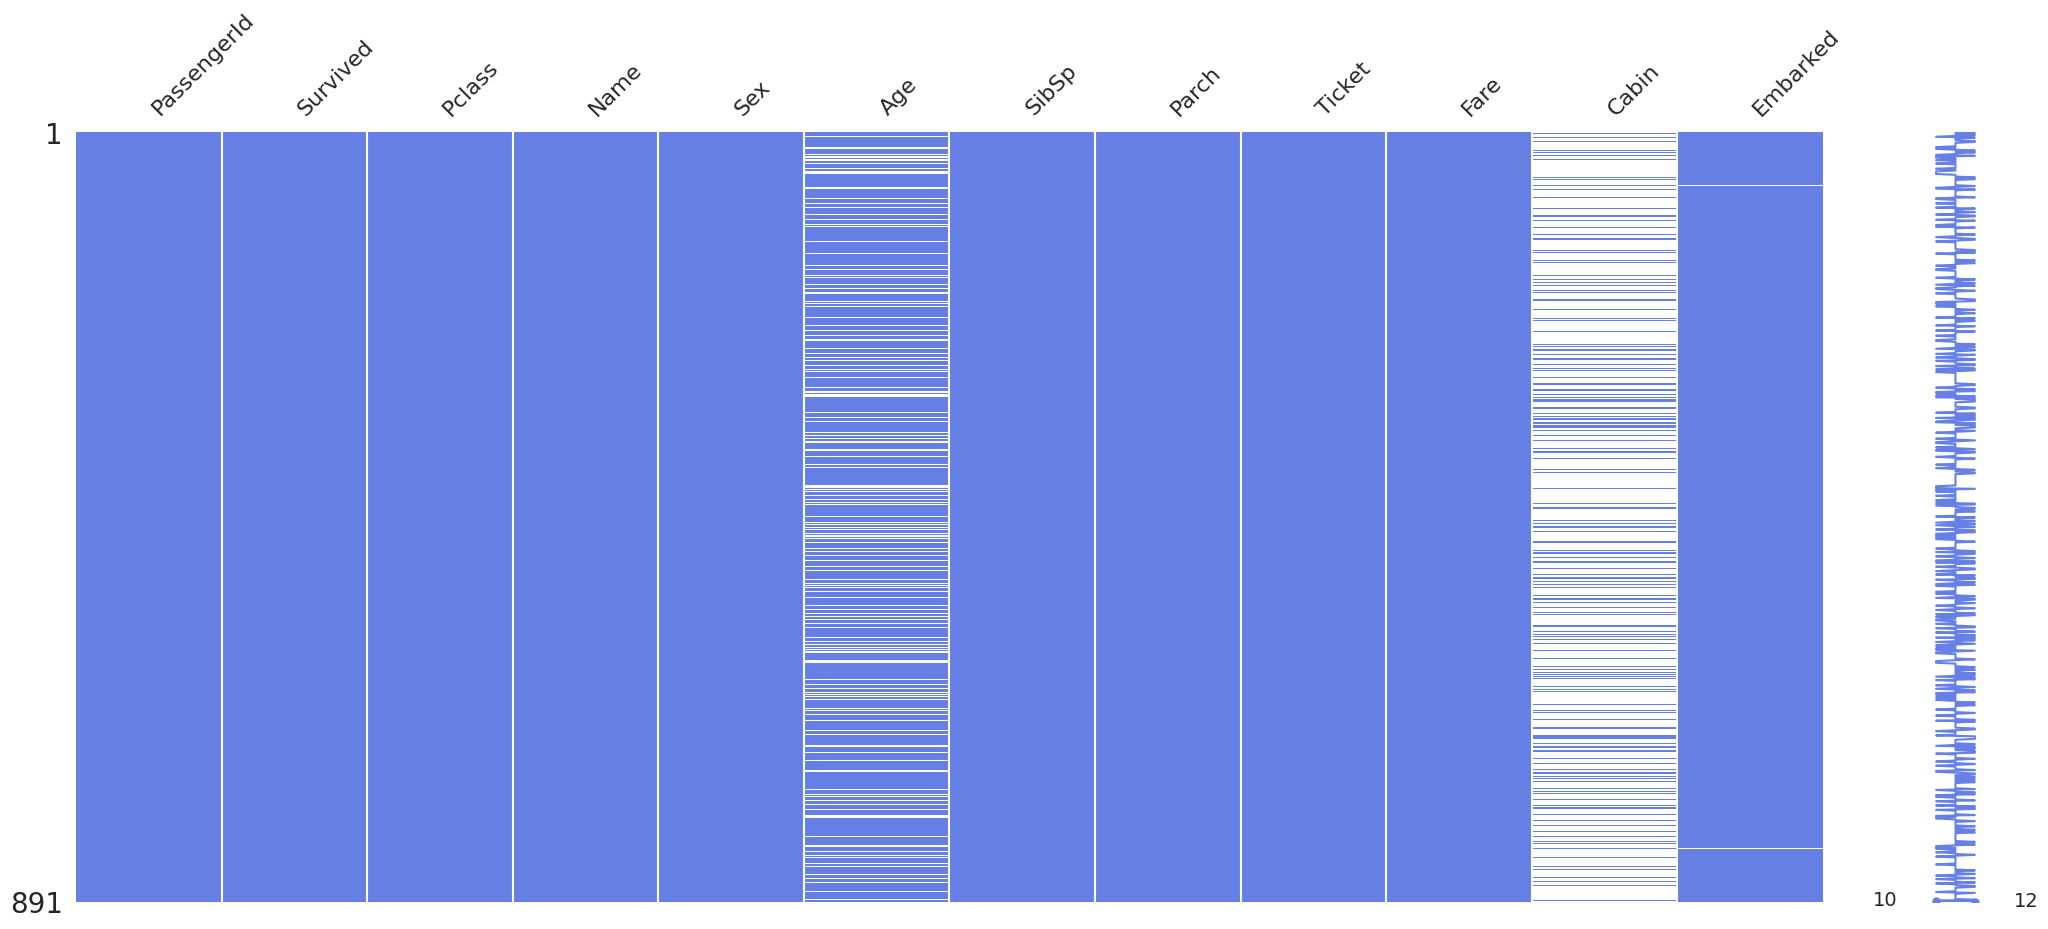

In [1424]:
msno.matrix(df=df_train.iloc[:,:],color=(0.4,0.5,0.9))

<Axes: >

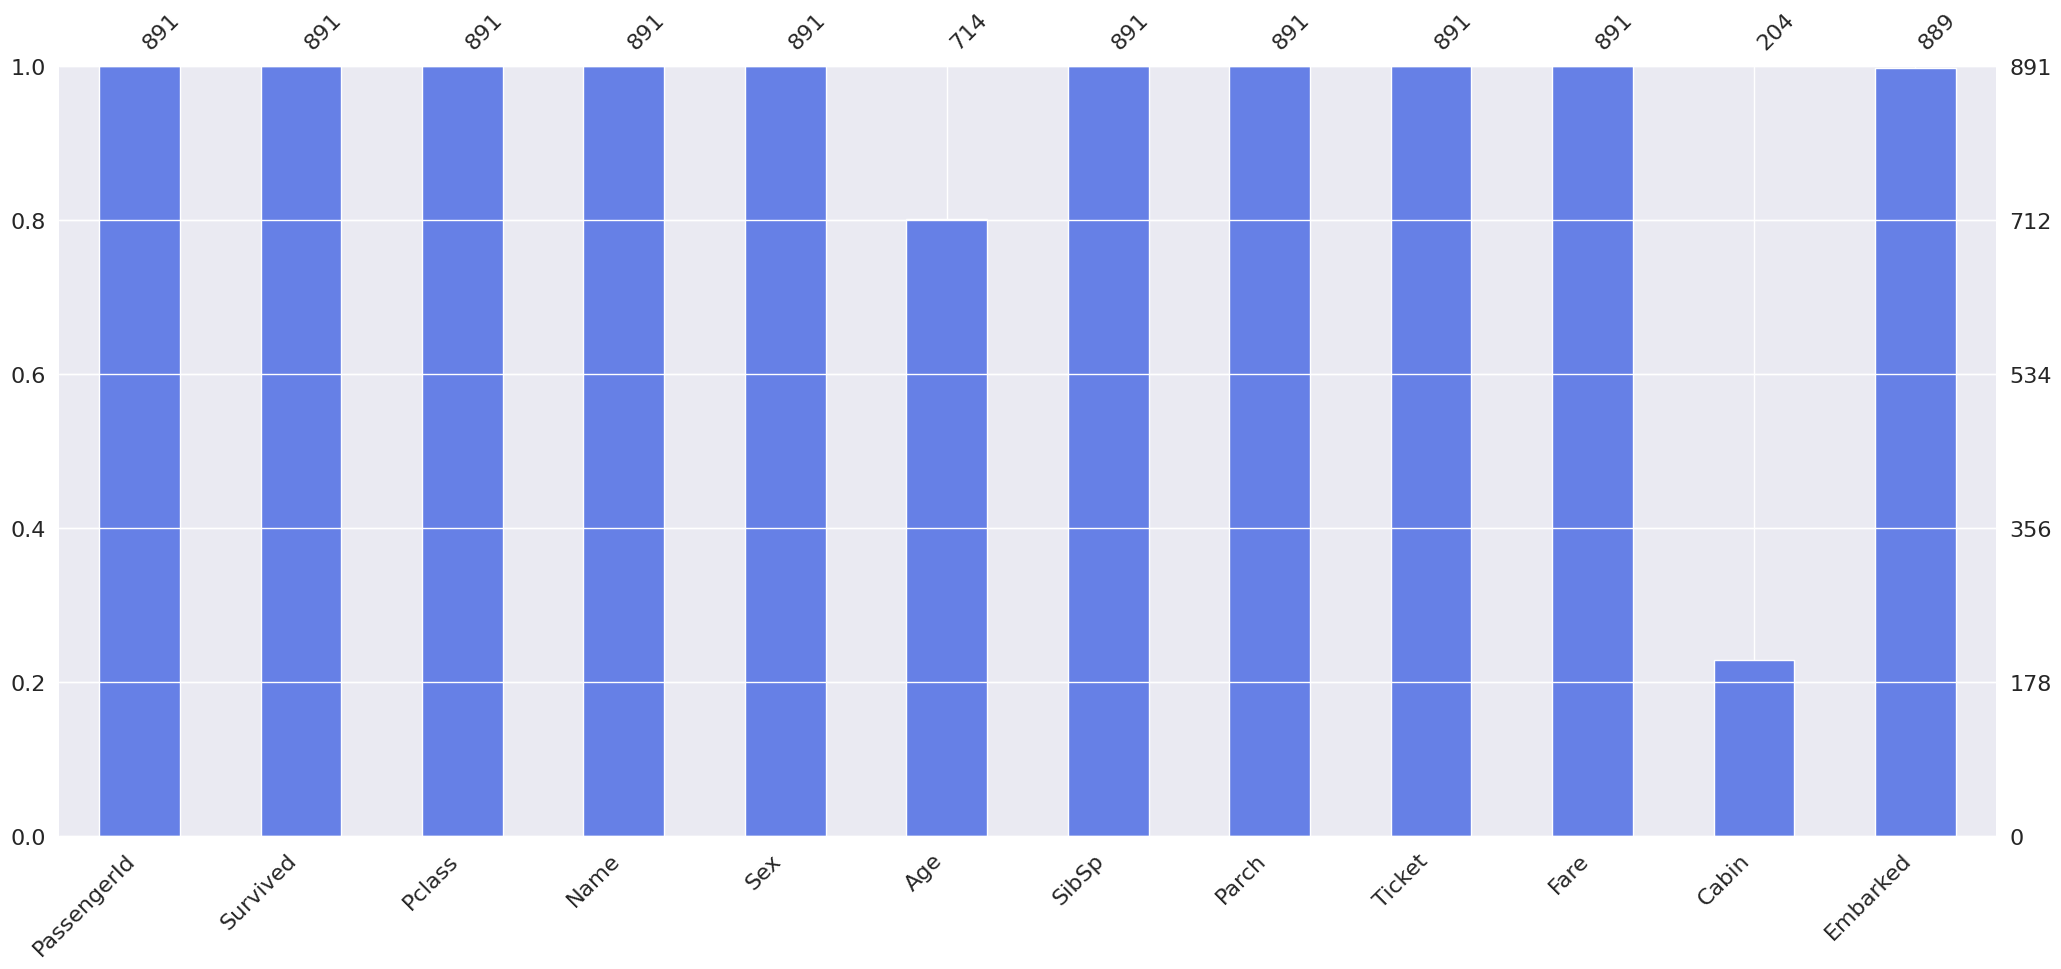

In [1426]:
msno.bar(df=df_train.iloc[:,:],color=(0.4,0.5,0.9))

<Axes: >

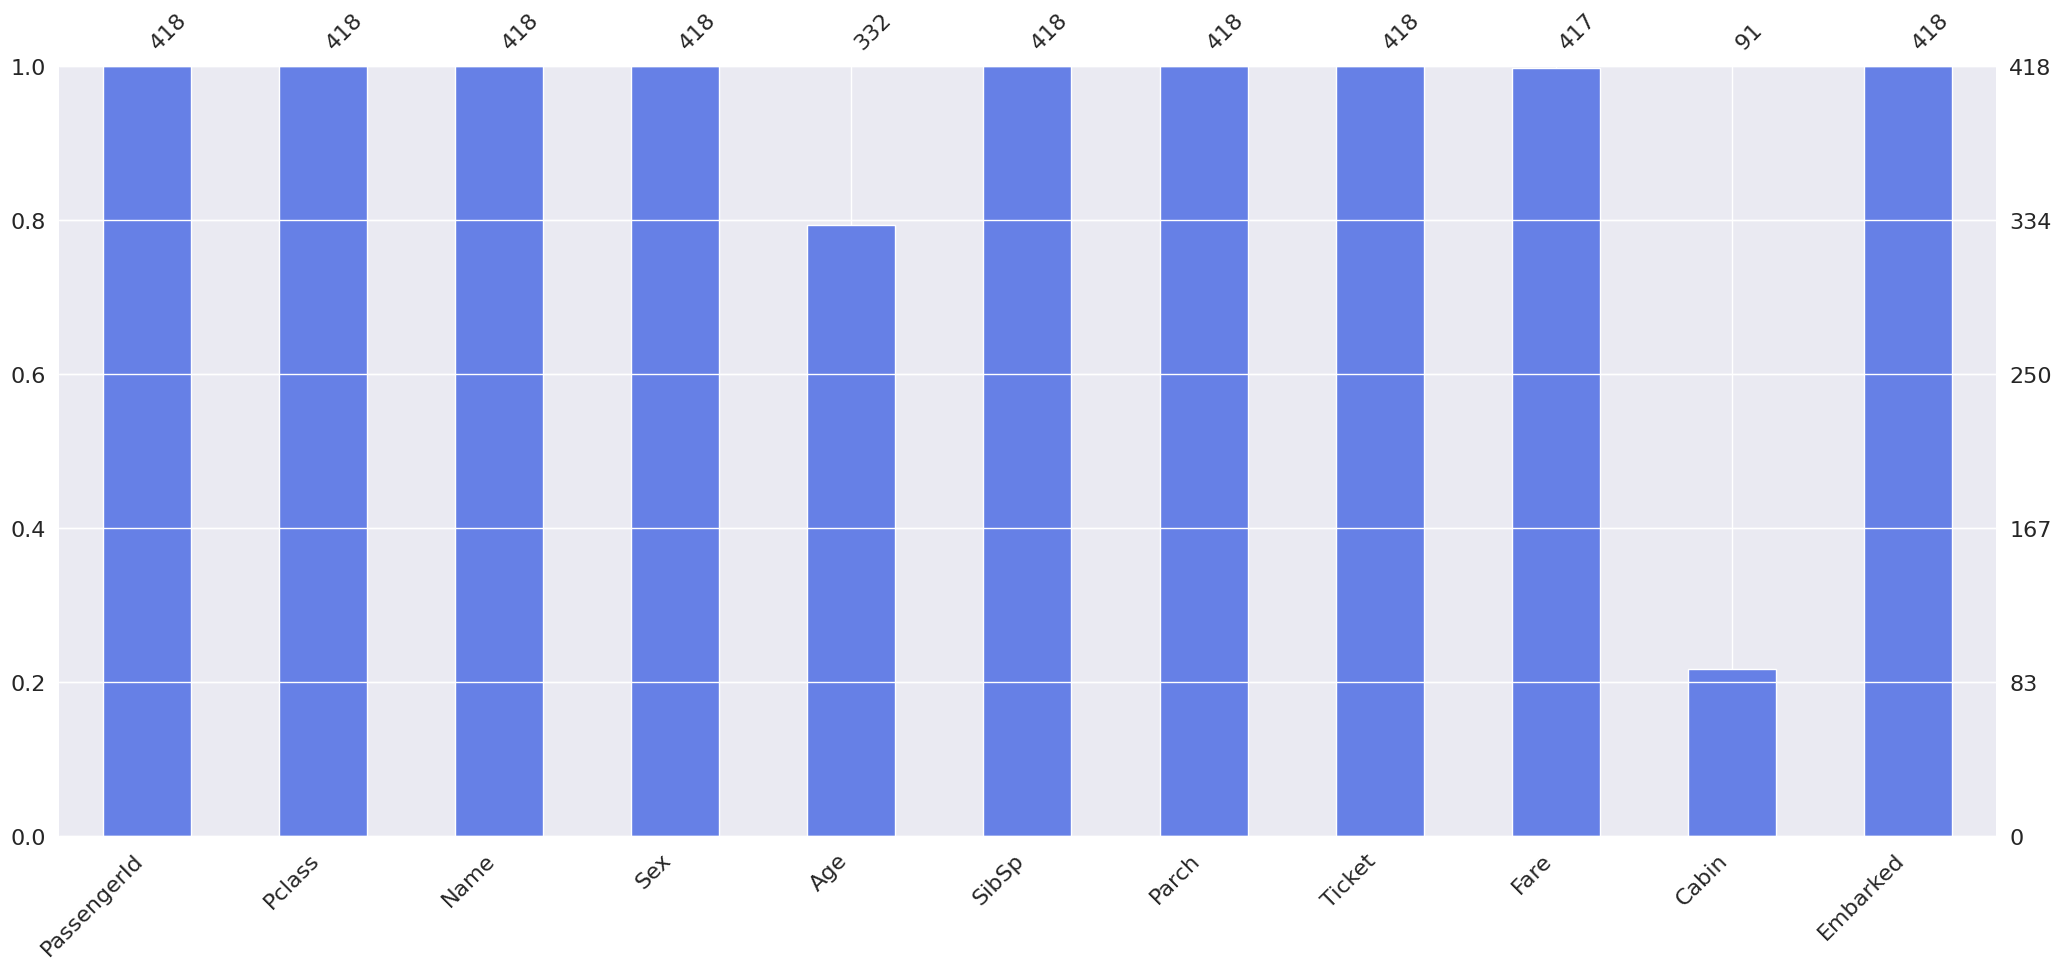

In [1428]:
msno.bar(df=df_test.iloc[:,:],color=(0.4,0.5,0.9))

---

# 1.2 Target Label 확인
- target lavel의 distribution을 확인해봐야함.
- binary classification 문제에서, 0과 1의 비율이 극단적인지를 확인해봐야함.

Figure(640x480)
[<Axes: > <Axes: >]


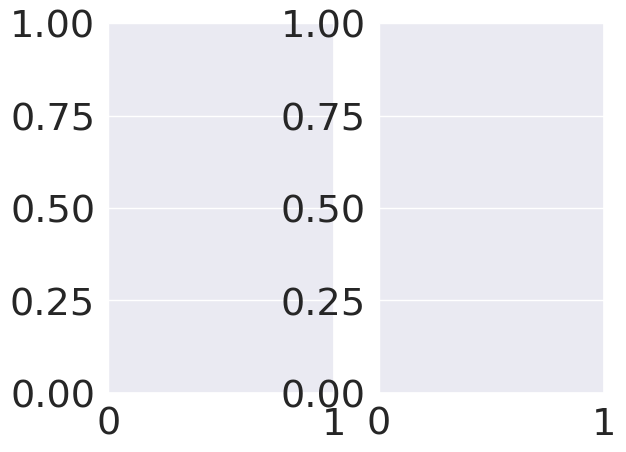

In [1430]:
fig, ax = plt.subplots(1,2)
print(fig)
print(ax)

In [1432]:
df_train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x78f5dc5d6e90>,
 [Text(-0.3925749350994583, 1.0275626113924428, ''),
  Text(0.42826367051652175, -1.1209773541493675, '')],
 [Text(-0.21413178278152267, 0.5604886971231505, '61.6%'),
  Text(0.249820474467971, -0.6539034565871309, '38.4%')])

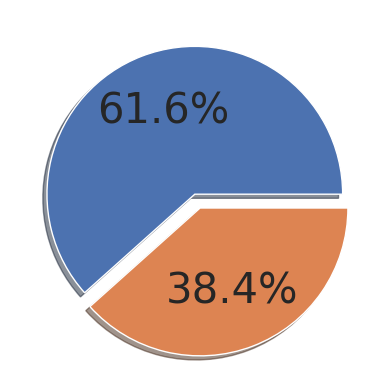

In [1434]:
plt.pie(df_train['Survived'].value_counts(),autopct='%.1f%%',explode=[0,0.1],shadow=True)

<Axes: xlabel='Survived', ylabel='count'>

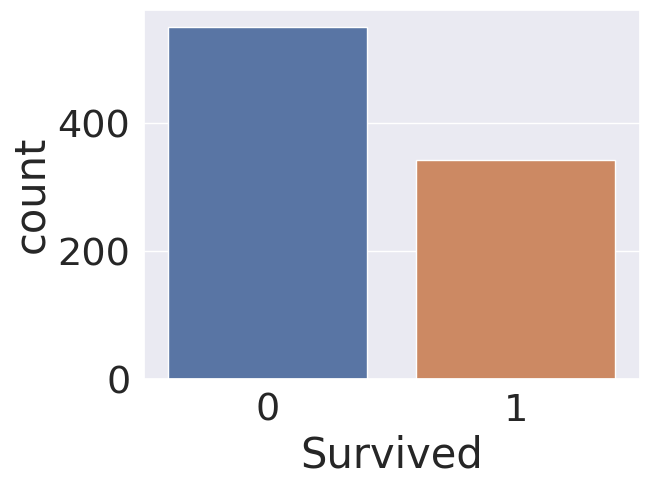

In [1436]:
sns.countplot(data=df_train,x='Survived')

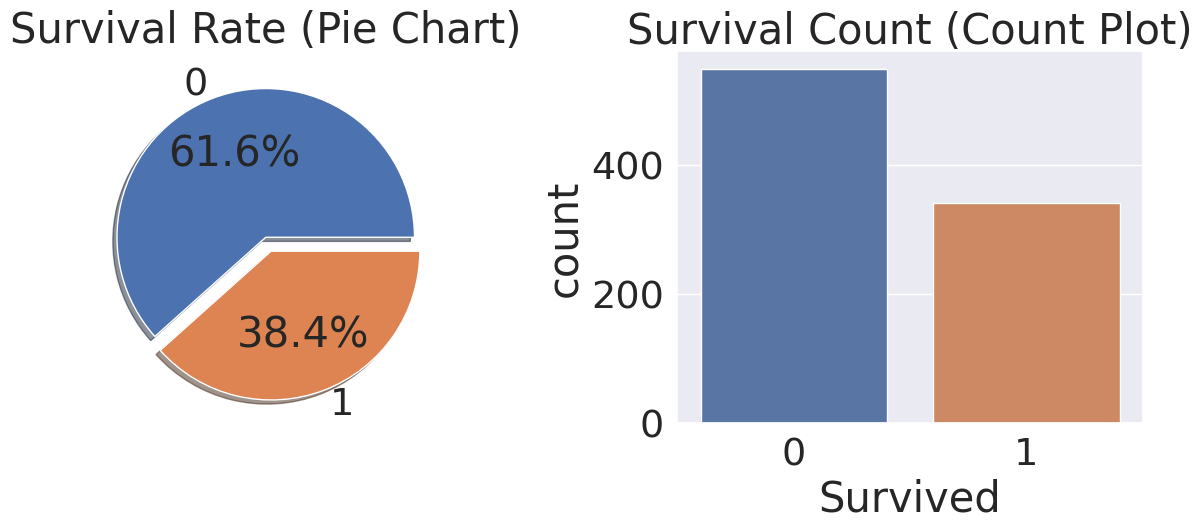

In [1438]:
# 1행 2열의 서브플롯(그래프를 그릴 공간)을 생성합니다.
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# 첫 번째 서브플롯 (ax[0])에 파이 차트를 그립니다.
ax[0].pie(
    df_train['Survived'].value_counts(), # 데이터
    autopct='%.1f%%',                  # 백분율 표시 (소수점 첫째 자리까지)
    explode=[0, 0.1],                  # 특정 조각을 튀어나오게 함
    shadow=True,                       # 그림자 효과
    labels=df_train['Survived'].value_counts().index # 각 조각의 라벨
)
ax[0].set_title('Survival Rate (Pie Chart)')


# 두 번째 서브플롯 (ax[1])에 카운트 플롯을 그립니다.
sns.countplot(
    data=df_train, # 사용할 데이터프레임
    x='Survived',  # x축으로 사용할 컬럼
    ax=ax[1]       # 그림을 그릴 위치 지정
)
ax[1].set_title('Survival Count (Count Plot)')

# 그래프들의 레이아웃을 자동으로 조정해줍니다.
plt.tight_layout()

# 그래프를 화면에 보여줍니다.
plt.show()

---

# 2. Exploratory Data Analysis
- 데이터는 매우 많다.
- 데이터 안에 숨겨진 사실을 찾기 위해선 적절한 시각화가 필요하다.

In [1440]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


# 2.1 Pclass
- pclass   /	Ticket class   /	1 = 1st, 2 = 2nd, 3 = 3rd
- pclass에 따른 생존율의 차이를 알아보자.

In [1442]:
df_train.groupby('Pclass')['Survived'].value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64

In [1444]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [1446]:
df_train.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

<Axes: xlabel='Survived', ylabel='Pclass'>

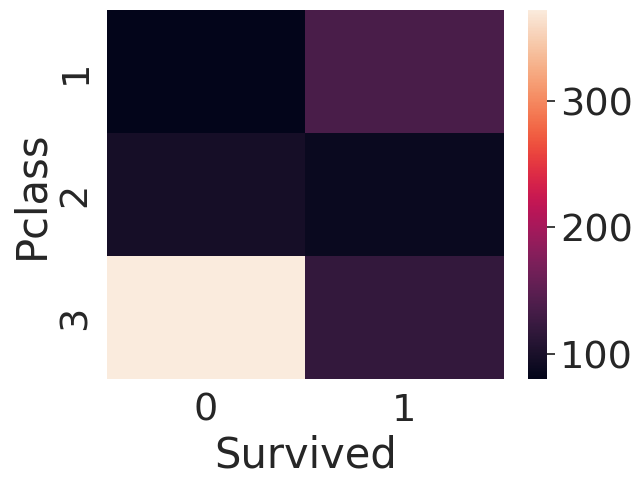

In [1448]:
df_crosstab = pd.crosstab(df_train['Pclass'],df_train['Survived'])
sns.heatmap(df_crosstab)

<BarContainer object of 3 artists>

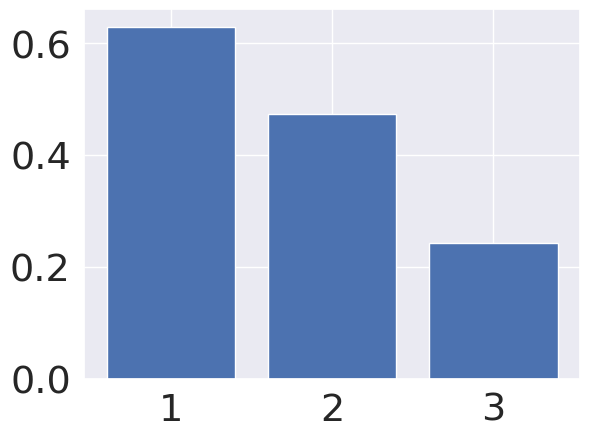

In [1450]:
plt.bar(['1','2','3'],df_train.groupby(['Pclass'])['Survived'].mean())

<Axes: xlabel='Pclass'>

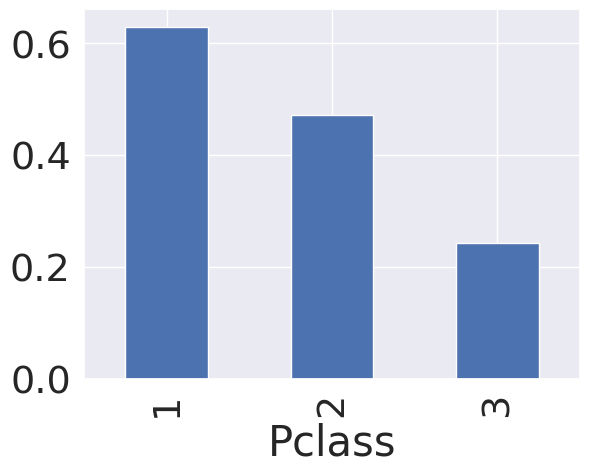

In [1452]:
df_train.groupby('Pclass')['Survived'].mean().plot.bar()

<Axes: xlabel='Pclass', ylabel='count'>

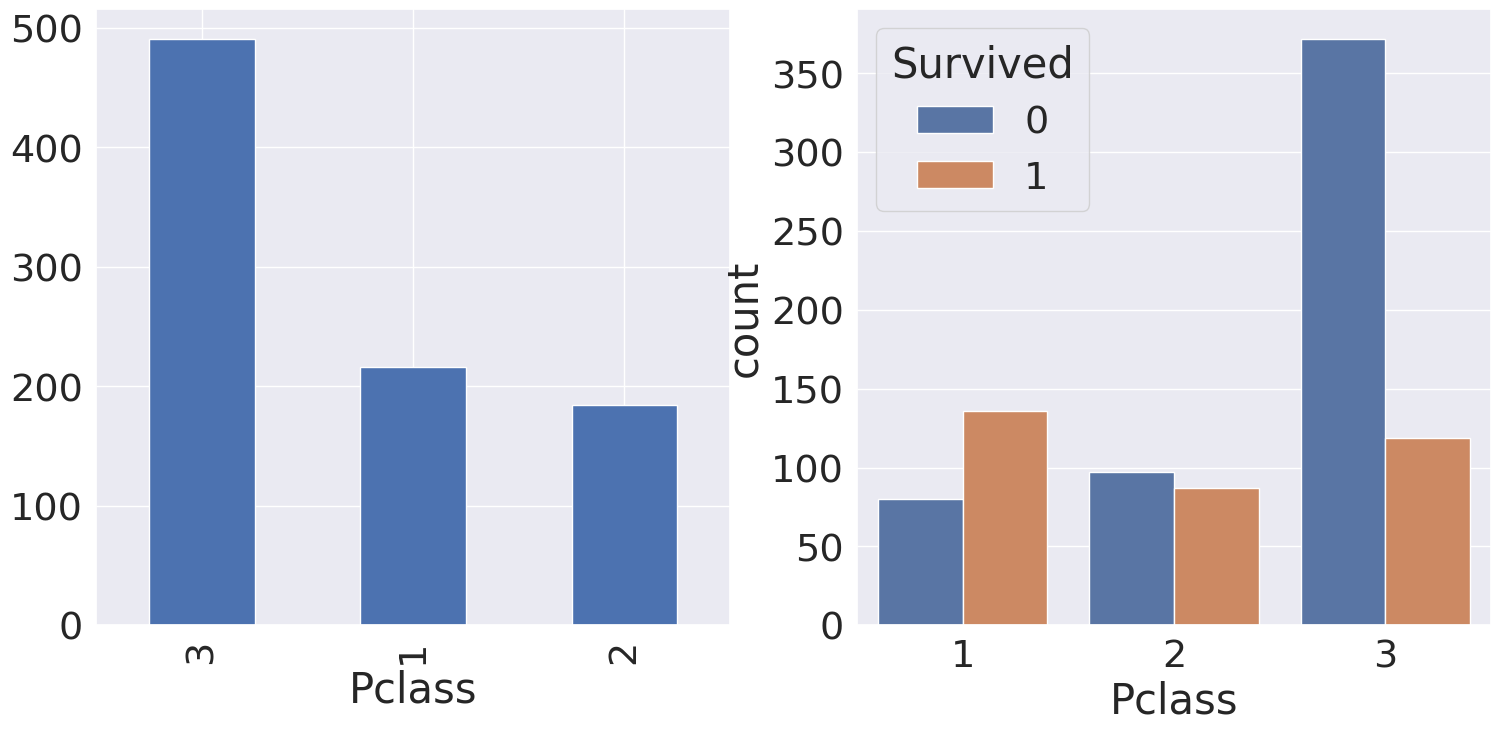

In [1454]:
f,ax = plt.subplots(1,2,figsize=(18,8))
# 왼쪽엔 Pclass에 따른 승객 수
df_train['Pclass'].value_counts().plot.bar(ax=ax[0])

# 오른쪽엔 Pclass에 따른 Survived, Dead 수
sns.countplot(x='Pclass',hue='Survived',data=df_train,ax=ax[1])

In [1456]:
df_train['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

<Axes: xlabel='Pclass,Survived'>

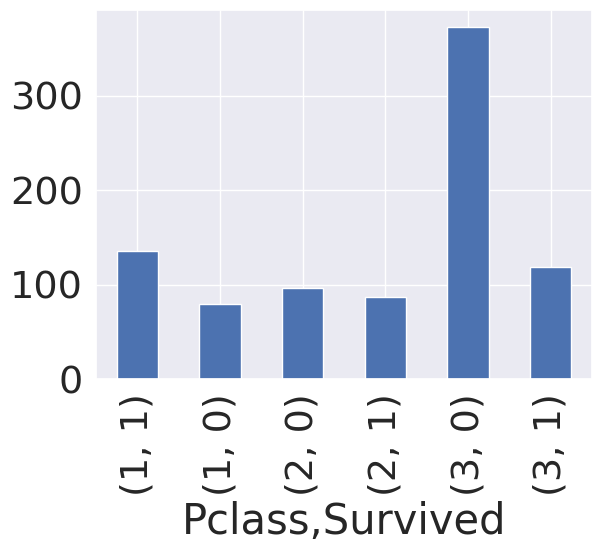

In [1458]:
#Pclass에 따른 Survived, Dead 수
df_train.groupby('Pclass')['Survived'].value_counts().plot.bar()

<Axes: xlabel='Pclass', ylabel='count'>

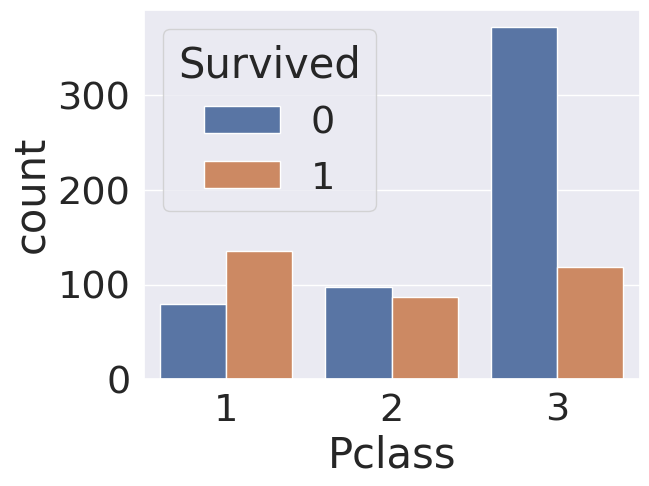

In [1460]:
sns.countplot(x='Pclass',hue='Survived',data=df_train)

# 2.2 Sex
- 성별에 따른 생존율의 차이를 알아보자.

Text(0.5, 1.0, 'Sex: Survived vs Dead')

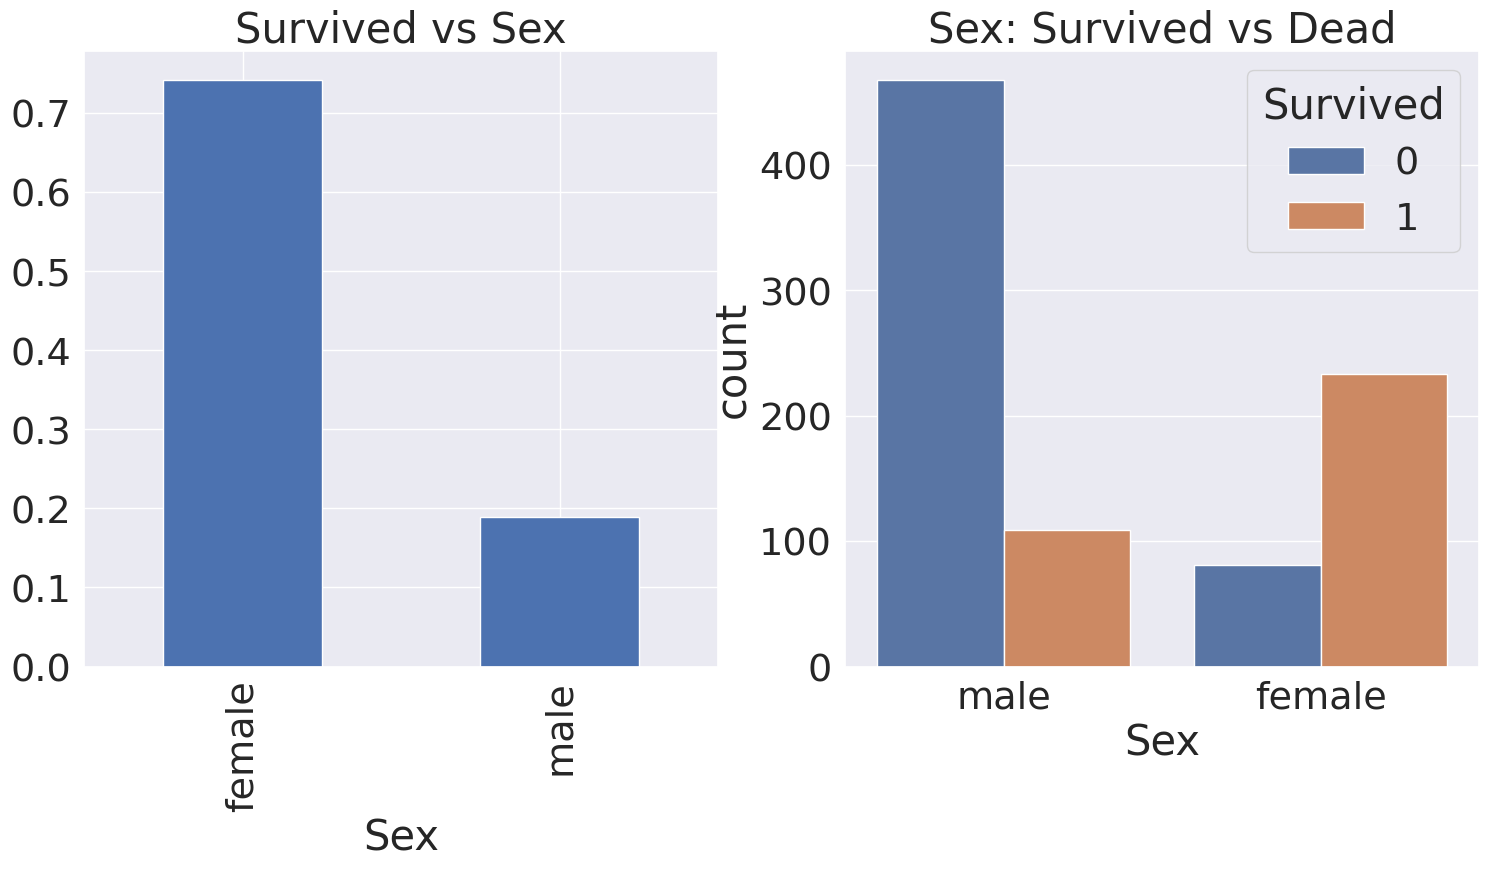

In [1462]:
# 왼쪽에는 성별(x축)에 따른 생존율
# 오른쪽에는 성별에 따른 Survived, Dead 수 나누기
f, ax = plt.subplots(1,2,figsize=(18,8))
df_train.groupby('Sex')['Survived'].mean().plot.bar(ax= ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x= 'Sex', hue='Survived', data = df_train,ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')

In [1464]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


<Axes: xlabel='Sex'>

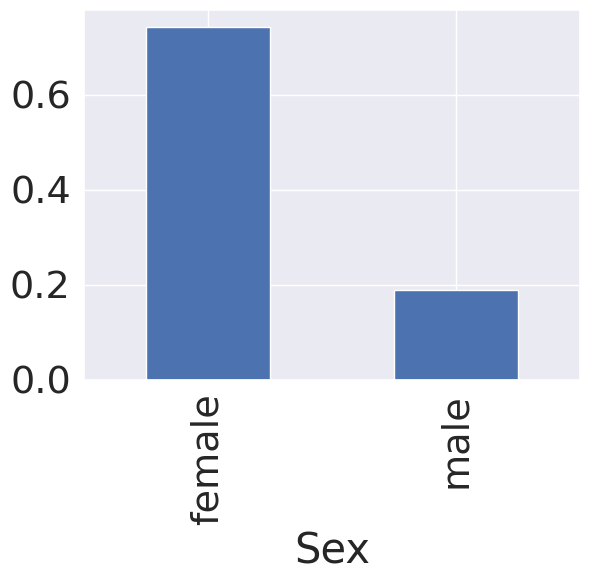

In [1466]:
# 왼쪽에는 성별(x축)에 따른 생존율
df_train.groupby('Sex')['Survived'].mean().plot.bar()

<Axes: xlabel='Sex', ylabel='count'>

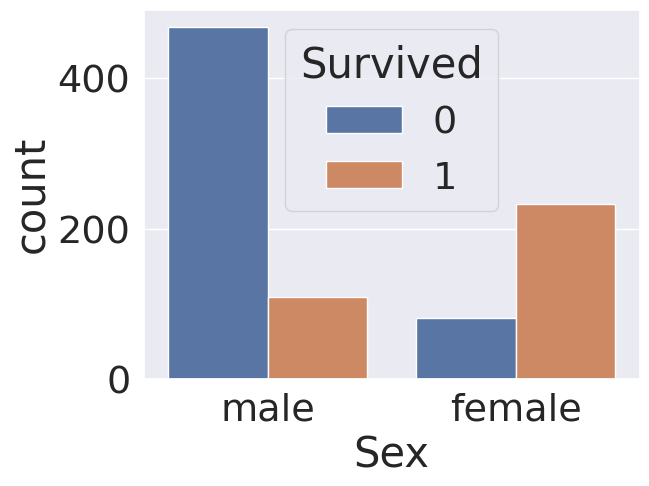

In [1468]:
# 오른쪽에는 성별에 따른 Survived, Dead 수 나누기
sns.countplot(x= 'Sex', hue='Survived', data = df_train)

In [1470]:
pd.crosstab(df_train['Sex'],df_train['Survived'],margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


# 2.3 Both Sex and Pclass
- 성별과 Pclass에 따른 생존율의 차이를 알아보자.

In [1472]:
df_train['Survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

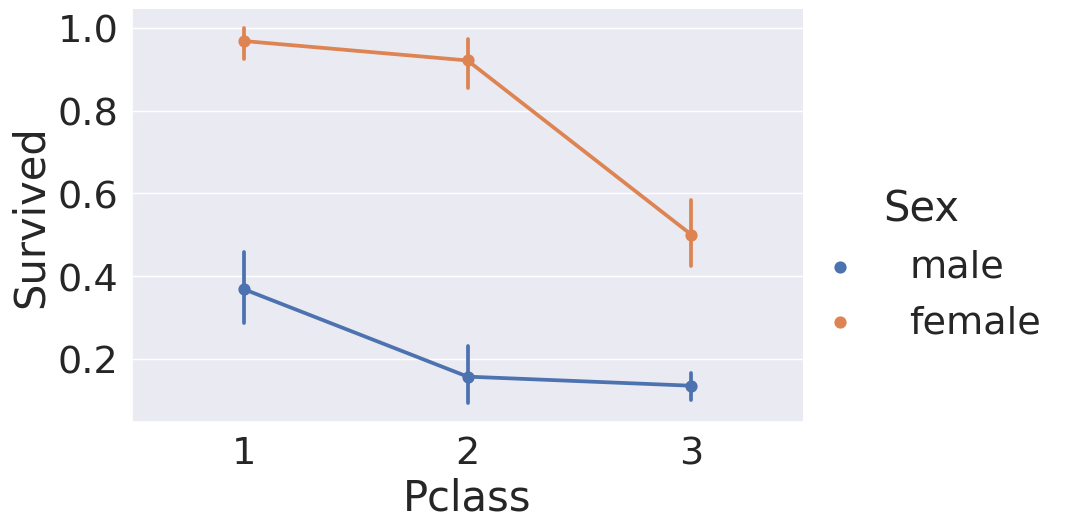

In [1474]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=df_train, kind='point', height=6, aspect=1.5)

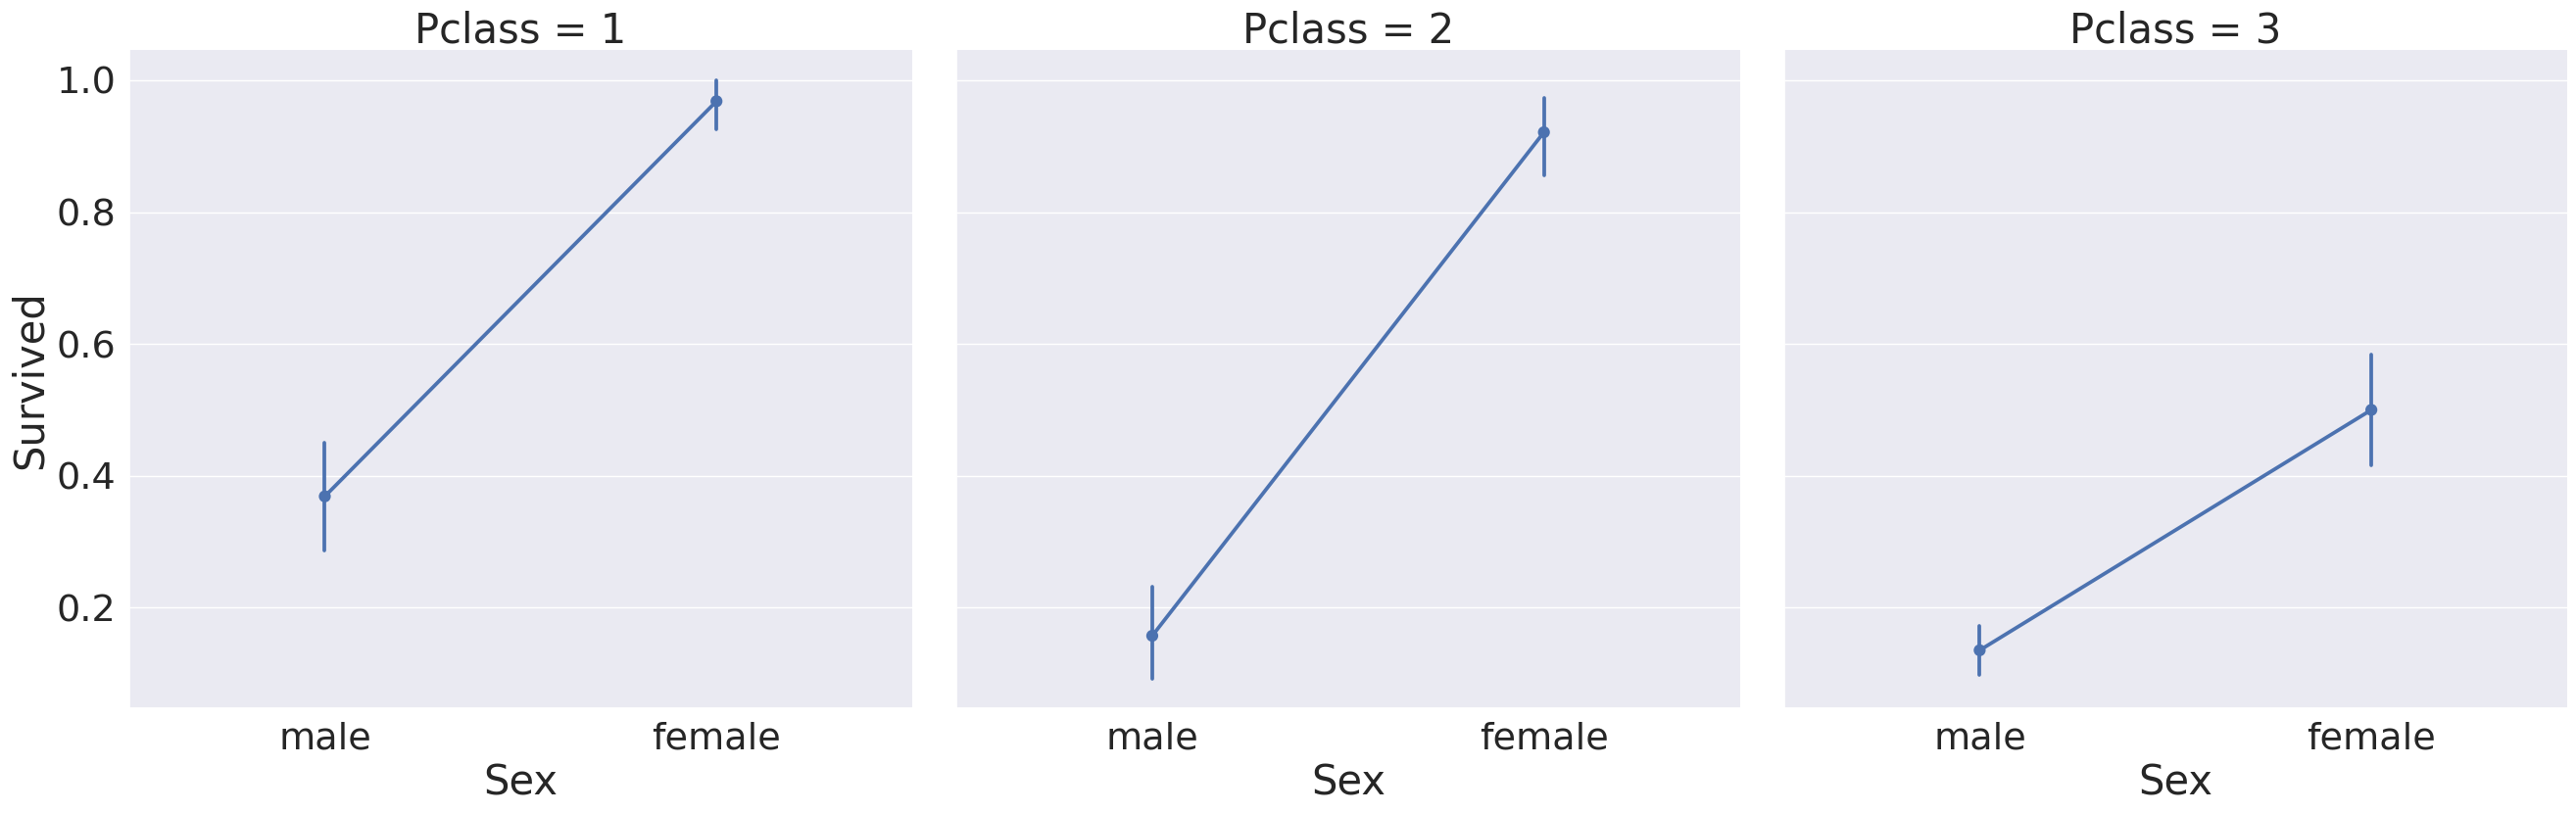

In [1476]:
sns.catplot(x='Sex',y='Survived', col='Pclass', data=df_train, height=9, aspect=1, kind='point')

# 2.4 Age
- Age에 따른 생존율의 차이를 알아보자.

In [1478]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [1480]:
# 나이 최댓값 최솟값 평균값 구하기

print("나이 최댓값: {}".format(df_train['Age'].max()))
print("나이 최솟값: {}".format(df_train['Age'].min()))
print("나이 평균값: {}".format(df_train['Age'].mean()))

나이 최댓값: 80.0
나이 최솟값: 0.42
나이 평균값: 29.841941638608304


<Axes: xlabel='Age', ylabel='Density'>

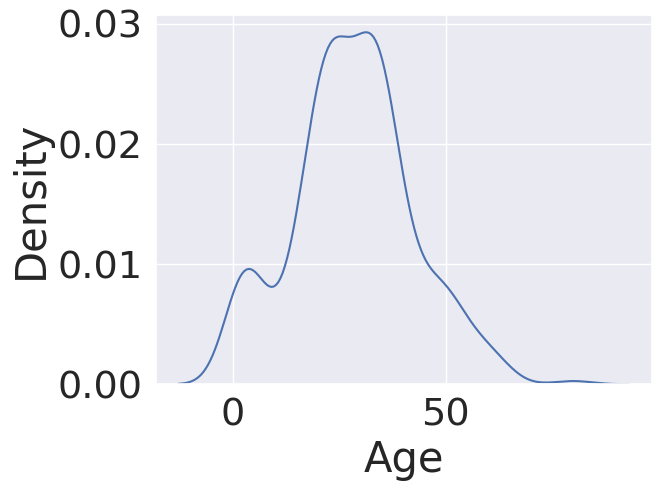

In [1482]:
# 생존에 따른 age의 kde 확률밀도함수
# 살아남은 사람의 age kde 확률밀도함수
sns.kdeplot(df_train[df_train['Survived']==1]['Age'])

<Axes: xlabel='Age', ylabel='Density'>

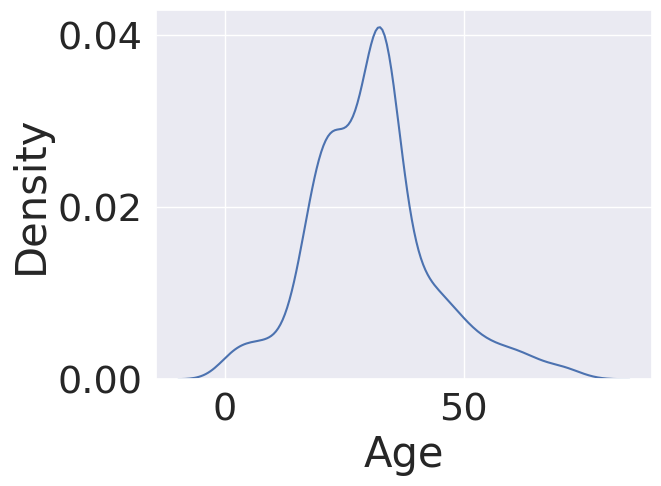

In [1484]:
# 생존에 따른 age의 kde 확률밀도함수
# 죽은 사람의 age kde 확률밀도함수
sns.kdeplot(df_train[df_train['Survived']==0]['Age'])

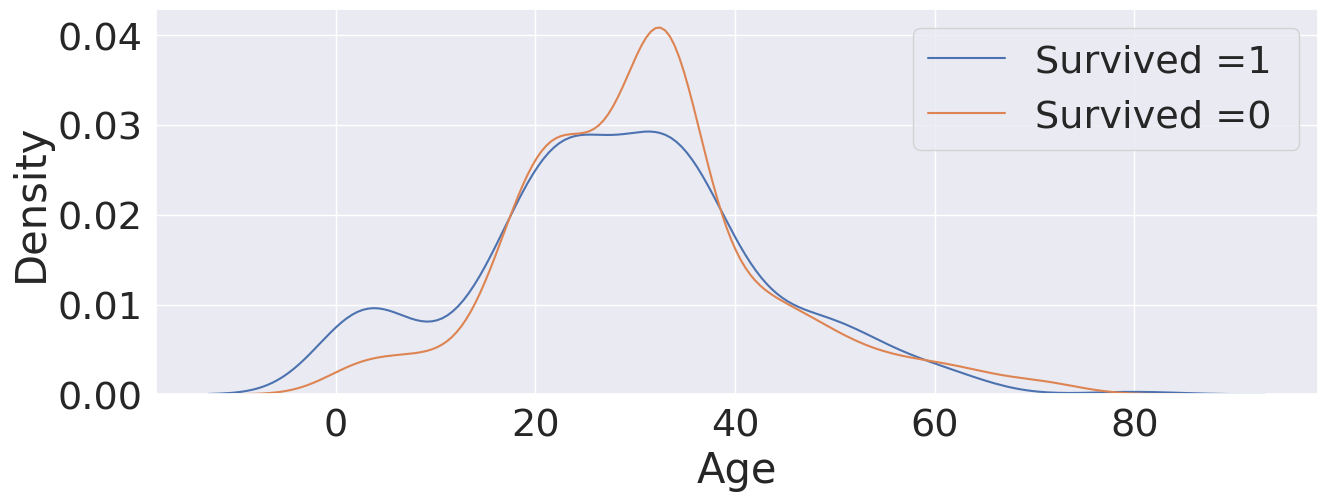

In [1486]:
# 하나에 overlay
fig, ax = plt.subplots(1,1,figsize=(15,5))
sns.kdeplot(df_train[df_train['Survived']==1]['Age'],ax=ax)
sns.kdeplot(df_train[df_train['Survived']==0]['Age'],ax=ax)
plt.legend(['Survived =1 ', 'Survived =0 '])
plt.show()

# 2.5 Pclass Sex Age 한번에

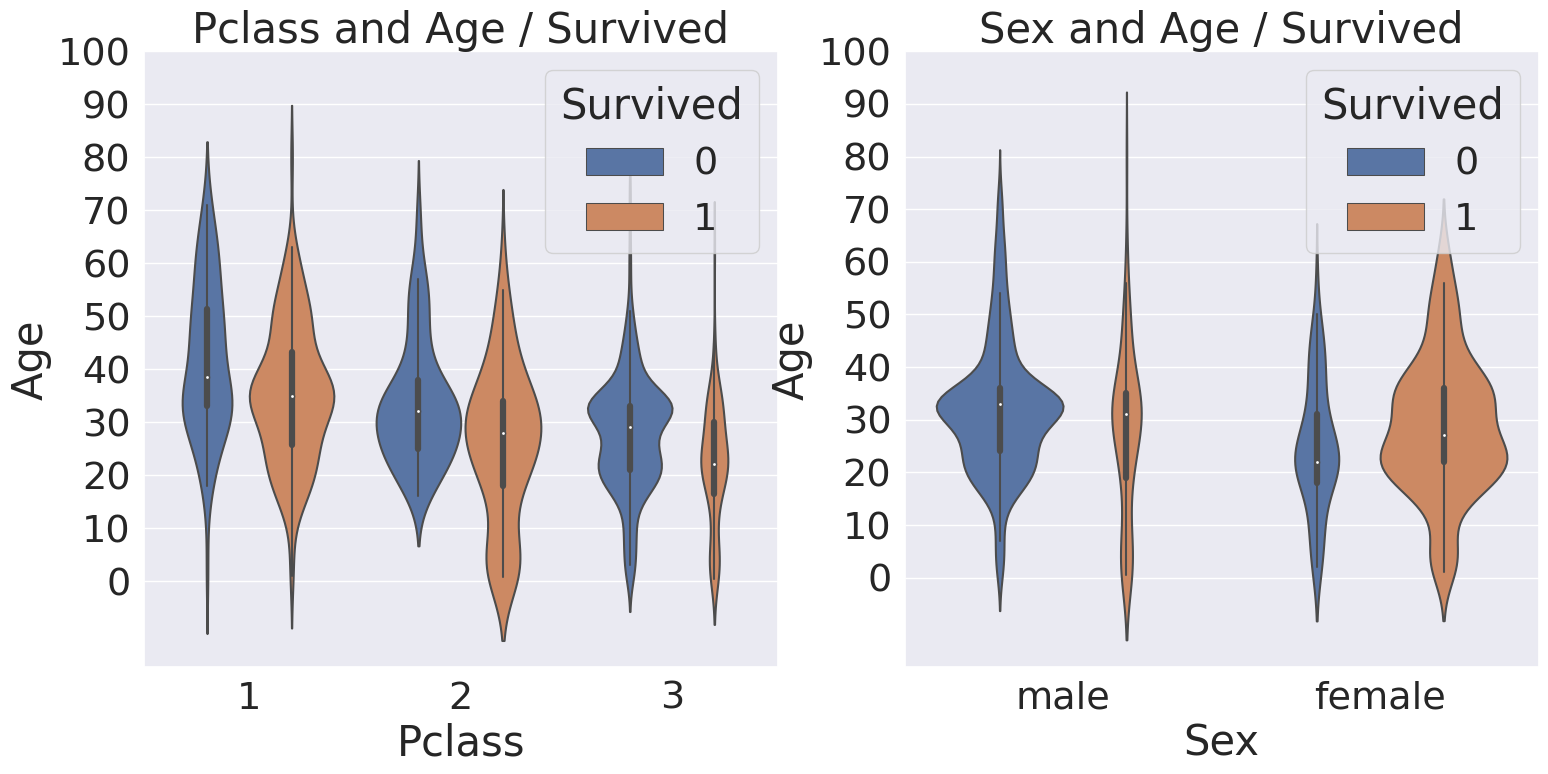

In [1488]:
f, ax = plt.subplots(1,2,figsize=(18,8))

# 우선 Pclass 별로 Age기준 생존 확률밀도함수
sns.violinplot(x='Pclass',y='Age',data= df_train, hue='Survived',ax=ax[0],scale='count')
ax[0].set_yticks(range(0,110,10))
ax[0].set_title('Pclass and Age / Survived')

# 오른쪽엔 Sex 별로 Age기준 생존 확률밀도함수
sns.violinplot(x='Sex',y='Age',data=df_train, hue='Survived',ax=ax[1],scale='count')
ax[1].set_yticks(range(0,110,10))
ax[1].set_title('Sex and Age / Survived')

plt.show()

# 2.6 Embarked
- 탑승한 항구
- 탑승한 곳에 따른 생존률 보기

In [1490]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


<Axes: xlabel='Embarked'>

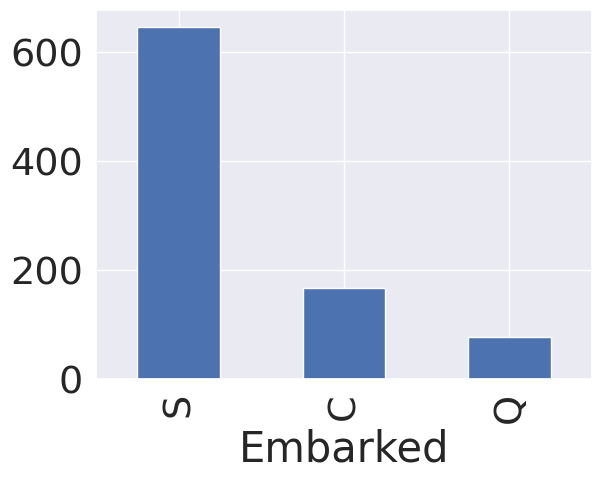

In [1492]:
df_train['Embarked'].value_counts().plot.bar()

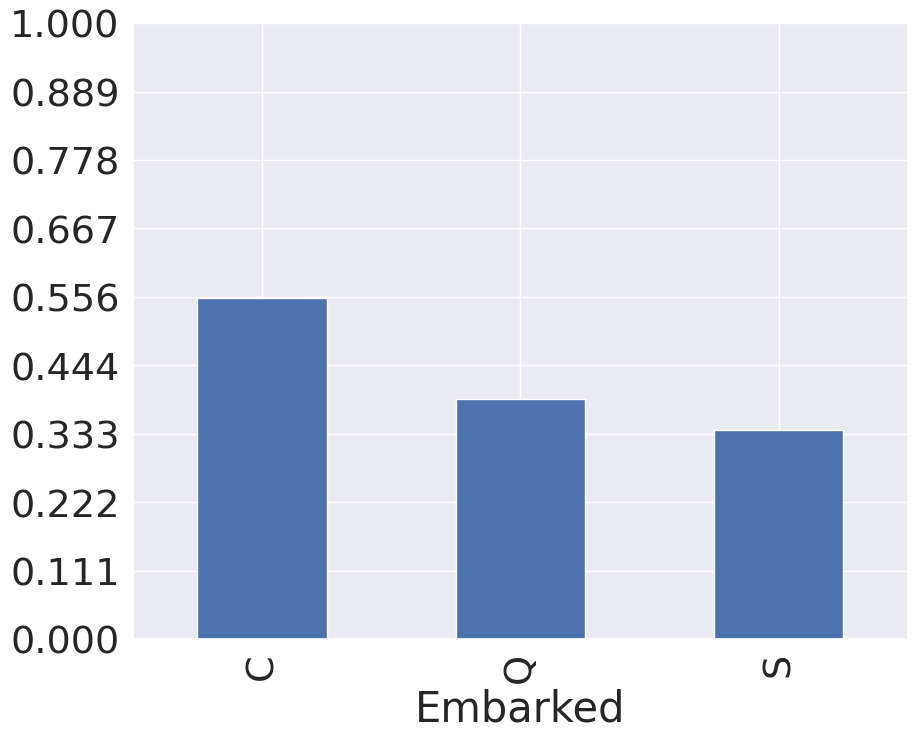

In [1494]:
f, ax = plt.subplots(1,1,figsize=(10,8))
# 탑승 항구에 따른 생존률을 알아보자.

df_train.groupby('Embarked')['Survived'].mean().sort_values(ascending=False).plot.bar(ax= ax)
ax.set_yticks(np.linspace(0, 1, 10))

plt.show()

<Axes: xlabel='Embarked', ylabel='Survived'>

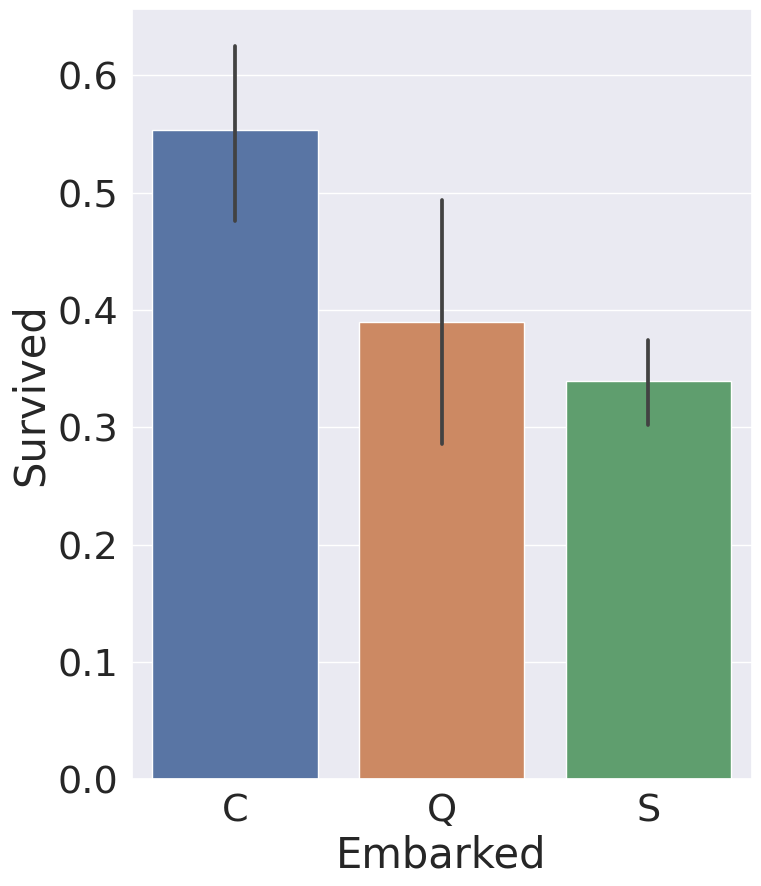

In [1496]:
f, ax = plt.subplots(1,1,figsize=(8,10))
my_order = df_train.groupby('Embarked')['Survived'].mean().sort_values(ascending=False).index
sns.barplot(x = 'Embarked', y ='Survived', data=df_train, ax=ax, order=my_order)

`countplot`과 `barplot`의 차이는 **"Y축을 직접 계산하느냐, 아니면 Y축에 쓸 값을 내가 정해주느냐"**에 있습니다.

---

### 🎨 `sns.countplot`: 개수 세기 (Count)

`countplot`은 Y축이 **무조건 "개수(Count)"**로 고정됩니다.

내가 할 일은 X축에 **어떤 범주형 변수('Column')의 개수를 셀지** 알려주기만 하면 됩니다. `y`축은 지정할 필요가 없습니다 (지정하면 안 됩니다).

* **질문:** "각 항구(`Embarked`)**별 승객 수**는 몇 명이야?"
* **필요한 것:** `x='Embarked'`
* **코드:** `sns.countplot(x='Embarked', data=df_train)`
* **결과:** Y축에 'S' 항구 644명, 'C' 항구 168명... 처럼 **개수(count)**가 표시됩니다.



---

### 📊 `sns.barplot`: 평균 계산 (Bar)

`barplot`은 X축 범주(`x`)별로 Y축에 지정된 **숫자 변수(`y`)의 통계치(기본값: 평균)**를 계산하여 막대로 그립니다.

내가 할 일은 X축(`x`)과 Y축(`y`)을 **모두 지정**하는 것입니다.

* **질문:** "각 항구(`Embarked`)별 **평균 생존율**은 얼마야?"
* **필요한 것:** `x='Embarked'`, `y='Survived'`
* **코드:** `sns.barplot(x='Embarked', y='Survived', data=df_train)`
* **결과:** Y축에 'C' 항구 0.55(55%), 'Q' 항구 0.38(38%)... 처럼 `Survived` 열의 **평균(mean)**이 표시됩니다.



---

### 💡 바로 떠올리는 법 (핵심 요약)

* " ~별 인원수", "~별 승객 수"**처럼 **개수(Count)**가 궁금하다?
    * ➡️ **`countplot`** (X축만 지정)
* " ~별 평균", "~별 생존율", "~별 나이"**처럼 **평균값(Mean)**이 궁금하다?
    * ➡️ **`barplot`** (X축과 Y축 모두 지정)

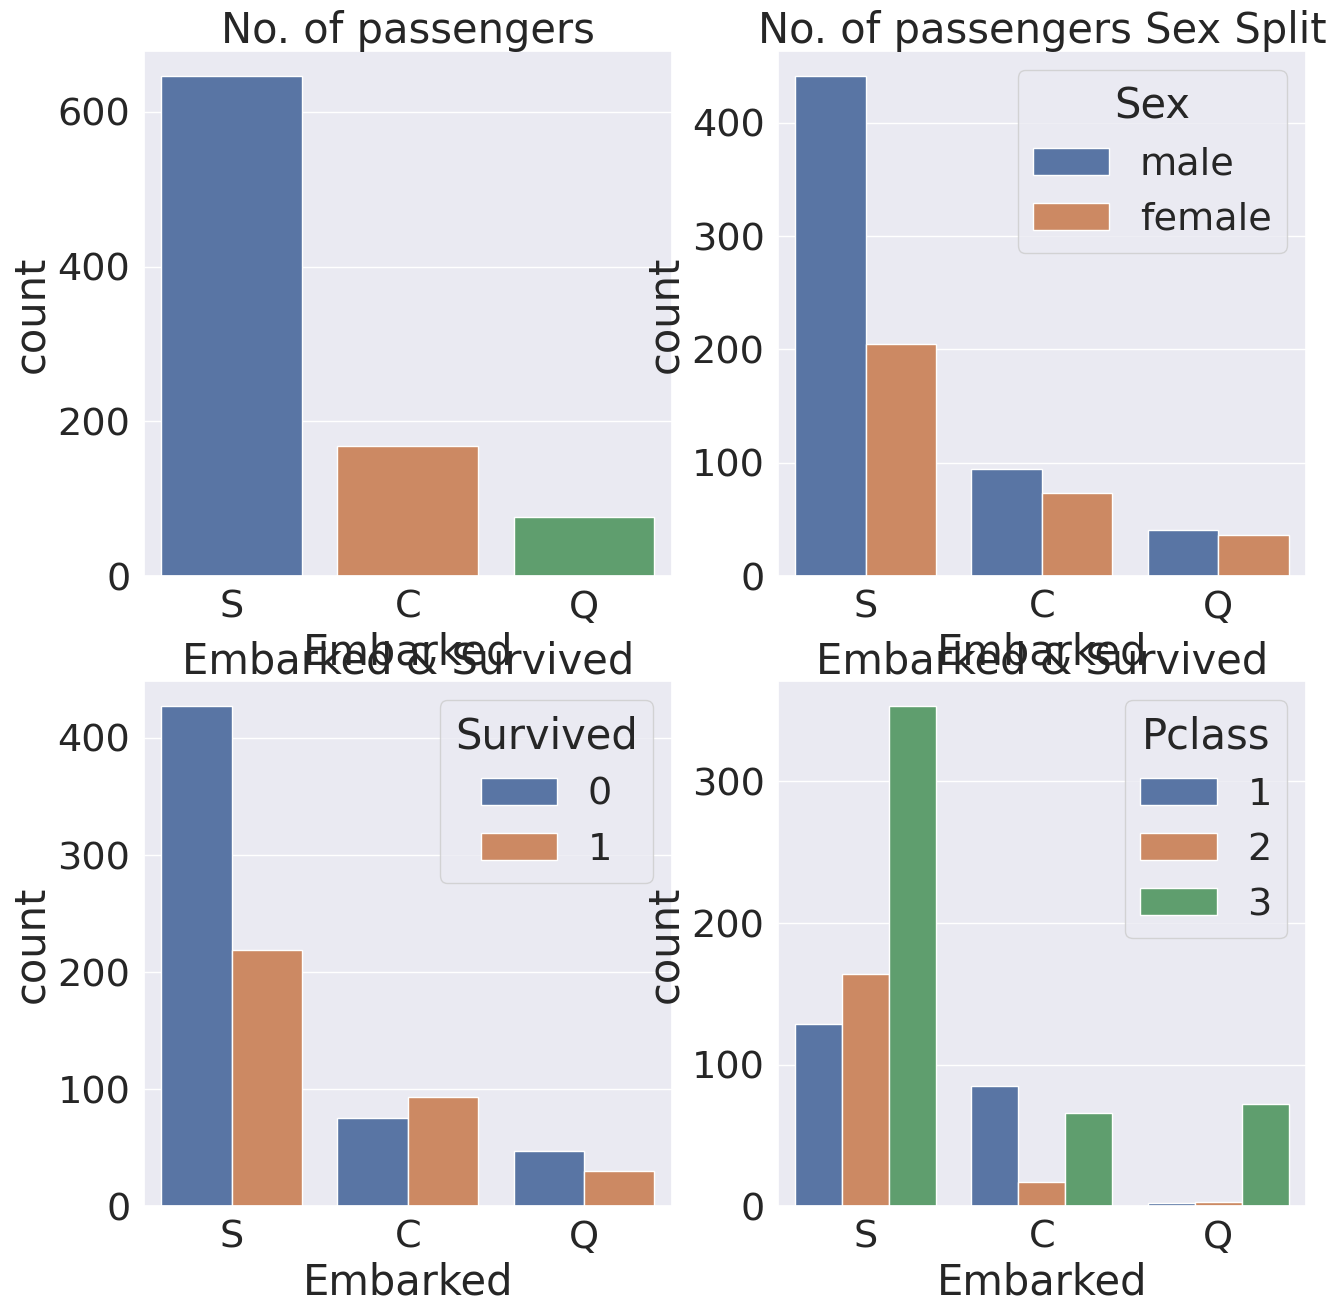

In [1498]:
f, ax = plt.subplots(2,2,figsize=(15,15))

# 첫번째는 탑승 항구에 따른 승객 수 막대그래프
sns.countplot(ax=ax[0,0], data=df_train, x='Embarked')
ax[0,0].set_title('No. of passengers')

# 두번째는 첫번째를 sex 구분
sns.countplot(ax=ax[0,1],data=df_train,x='Embarked',hue='Sex')
ax[0,1].set_title('No. of passengers Sex Split')

# 세번째는 탑승 항구에 따른 생존자 구분
sns.countplot(ax=ax[1,0],data=df_train,x='Embarked',hue='Survived')
ax[1,0].set_title('Embarked & Survived')

# 네번째는 탑승 항구에 따른 Pclass 구분
sns.countplot(ax=ax[1,1],data=df_train,x='Embarked',hue='Pclass')
ax[1,1].set_title('Embarked & Survived')

plt.show()

💡 무엇이 잘못되었나? (사고 교정)
사용자님의 코드는 2번 방식으로 "일단 3개의 그룹으로 나눈 다음"(groupby), 그 나눠진 그룹 객체에 대고 1번 방식인 value_counts()를 실행하라고 한 것입니다.

value_counts()는 단일 열에 사용하는 함수인데, 그룹 객체에 사용하려 하니 의도대로 작동하지 않는 것입니다.

올바른 사고의 흐름:

질문: "'Embarked' 열에 'S', 'C', 'Q'가 각각 몇 개 있어?"

선택 1 (Best): "하나의 열(Embarked)에 대한 질문이네? -> value_counts() 써야지!"

df_train['Embarked'].value_counts()

선택 2 (groupby 사용): "데이터 전체를 Embarked 기준으로 묶은 다음(groupby), 각 그룹의 **크기(size)**를 재야지!"

df_train.groupby('Embarked').size()

In [1500]:
# 잘못된 코드
df_train.groupby('Embarked').value_counts()

Embarked  PassengerId  Survived  Pclass  Name                                                 Sex     Age   SibSp  Parch  Ticket    Fare      Cabin        Initial  Age_cat
C         2            1         1       Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  38.0  1      0      PC 17599  71.2833   C85          Mrs      3          1
          32           1         1       Spencer, Mrs. William Augustus (Marie Eugenie)       female  36.0  1      0      PC 17569  146.5208  B78          Mrs      3          1
          53           1         1       Harper, Mrs. Henry Sleeper (Myna Haxtun)             female  49.0  1      0      PC 17572  76.7292   D33          Mrs      4          1
          55           0         1       Ostby, Mr. Engelhart Cornelius                       male    65.0  0      1      113509    61.9792   B30          Mr       6          1
          97           0         1       Goldschmidt, Mr. George B                            male    71.0  0      0    

In [1502]:
df_train['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

# 2.7 df에 새로운 열 Family = SibSp(형제자매) + Parch(부모,자녀) 만들기


In [1504]:
family_train = df_train['SibSp']+df_train['Parch']+1
print(family_train.max())
print(family_train.min())
print(family_train.mean())

family_test = df_test['SibSp']+df_test['Parch']+1

11
1
1.904601571268238


In [1506]:
df_train['FamilySize'] = family_train
df_test['FamilySize'] = family_test

In [1508]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_cat,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S,2,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,3,3,2
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S,1,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,3,3,2
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S,2,3,1


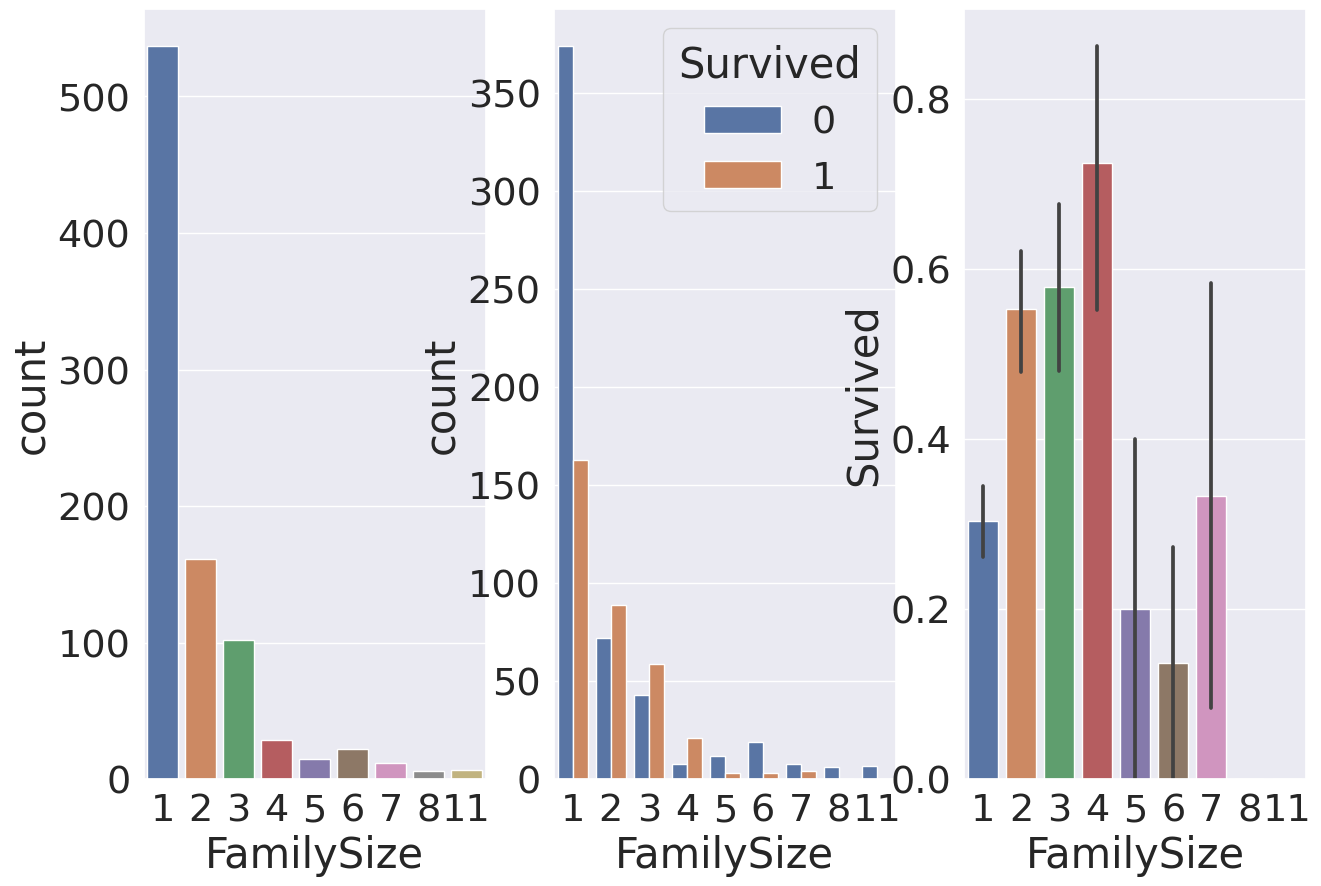

In [1510]:
# familysize와 생존의 관계를 살펴보자.

f,ax = plt.subplots(1,3,figsize=(15,10))
sns.countplot(ax=ax[0],data=df_train,x="FamilySize")

# familysize에 따른 생존자, 사망자 "수"
sns.countplot(ax=ax[1],data=df_train,x='FamilySize',hue='Survived')

# familysize에 따른 생존 "비율"
sns.barplot(ax=ax[2],data=df_train,x='FamilySize',y='Survived')
plt.show()

**1. `f, ax = plt.subplots()` 습관 들이기**

**Why? (사용 이유)**
* Matplotlib의 표준이자 명시적인 방법입니다.
* `figsize` (도화지 크기)를 그리기 전에 미리 설정하기 편합니다.
* `ax`라는 변수로 특정 그래프를 제어하기 쉽습니다. (e.g., `ax.set_title()`, `ax.set_yticks()`)
* `subplots(1, 1)` -> `subplots(1, 2)`처럼 여러 개의 그래프로 확장하기 좋습니다.

**How (Single Plot) (단일 그래프 예시)**
    f, ax = plt.subplots(1, 1, figsize=(8, 6))
    sns.barplot(data=df, x='Pclass', y='Survived', ax=ax)
    ax.set_title('My Title')
    plt.show()

**How (Multiple Plots) (다중 그래프 예시)**
    f, ax = plt.subplots(1, 2, figsize=(16, 6))
    sns.countplot(data=df, x='Sex', ax=ax[0])
    sns.histplot(data=df, x='Age', ax=ax[1])
    ax[0].set_title('Graph 1')
    ax[1].set_title('Graph 2')
    plt.show()

---

**2. Seaborn 핵심: Countplot vs Barplot**

**`sns.countplot` (개수 세기)**
* Y축이 무조건 **"개수(Count)"**로 고정됩니다.
* **언제?**: *"~별 인원수"*, *"~별 승객 수"* 등 개수 자체가 궁금할 때 습니다.
* **어떻게?**: `x`축 (또는 `y`축)만 지정합니다. (y축은 지정 안 함!)
* *Example*: `sns.countplot(x='Embarked', data=df, ax=ax)`

**`sns.barplot` (평균/비율 계산)**
* Y축이 지정된 변수의 **"평균(Mean)"**을 *자동 계산*합니다.
* **언제?**: *"~별 평균 나이"*, *"~별 생존율"* (Survived의 평균 = 생존율) 등 비율이나 평균이 궁금할 때 씁니다.
* **어떻게?**: `x`축과 `y`축을 **모두** 지정합니다.
* *Example*: `sns.barplot(x='Embarked', y='Survived', data=df, ax=ax)`

---

**3. 그 외 자주 쓰는 Seaborn Plot**

* **`sns.histplot` / `sns.kdeplot`**: 숫자(연속형) 변수 *하나*의 **분포**를 볼 때 씁니다. (히스토그램 / 밀도 곡선)
* **`sns.boxplot` / `sns.violinplot`**: *범주별* 숫자 변수의 **분포를 비교**할 때 씁니다. (e.g., Pclass별 Age 분포)
* **`sns.scatterplot`**: 두 *숫자* 변수 간의 **관계**를 볼 때 씁니다. (산점도)
* **`sns.lineplot`**: *순서* (주로 시간)에 따른 **트렌드**를 볼 때 씁니다.
* **`sns.heatmap`**: 변수 간의 **상관관계** 매트릭스를 시각화할 때 씁니다.

# 2.8 Fare
- 탑승요금. continuous feature

In [1512]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_cat,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S,2,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,3,3,2
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S,1,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,3,3,2
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S,2,3,1


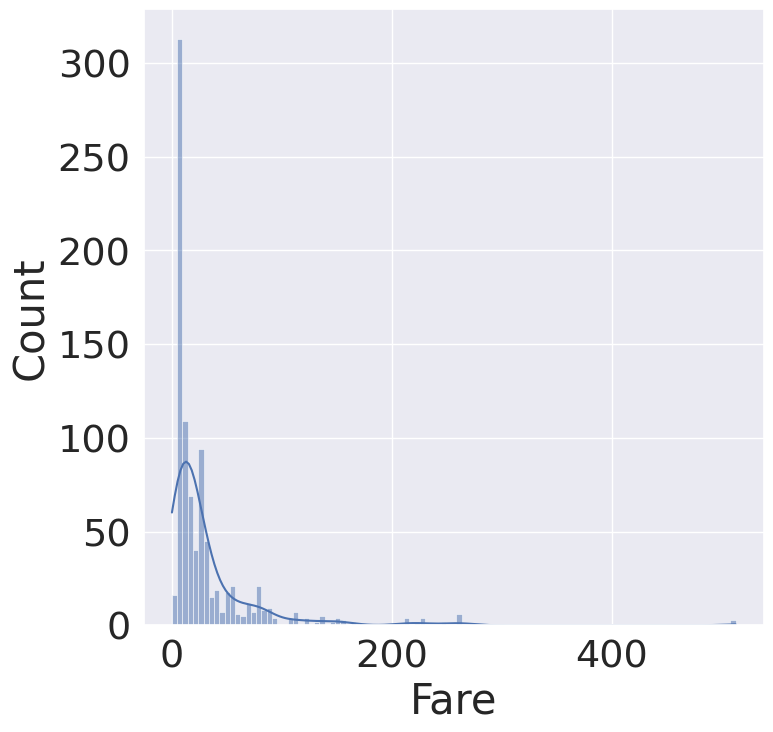

In [1514]:
# Fare의 히스토, kde 그래프를 동시에 그려보자.
f, ax = plt.subplots(1,1,figsize=(8,8))

sns.histplot(data=df_train, ax=ax, kde=True, x='Fare')

plt.show()

## distribution 이 매우 비대칭일 때
- outlier의 영향을 줄이기 위해 Fare 에 log 를 취하기

'Fare' (요금)에 로그를 취하는 이유는 데이터의 '쏠림' 현상 (Skewness)을 해결하기 위해서입니다.
아까 보신 'Fare' 그래프(Skewness : 4.79)를 떠올려보세요. 대부분의 승객은 0~50달러 사이의 저렴한 요금을 냈고, 아주 극소수만 200~500달러의 비싼 요금을 냈습니다.
데이터가 이렇게 한쪽(왼쪽)으로 심하게 쏠려있고 오른쪽으로 꼬리가 긴(right-skewed) 상태일 때, 머신러닝 모델이 안 좋은 영향을 받게 됩니다.

🧐 왜 '쏠림'이 문제가 될까요?

1.  아웃라이어(Outlier)의 과도한 영향: 500달러 같은 극단적인 값(아웃라이어)이 모델을 훈련시킬 때 너무 큰 영향력을 행사합니다. 모델이 "아, 요금이 500이면 무조건 사는구나!"처럼 잘못 학습할 수 있습니다.
2.  모델 성능 저하: 대부분의 머신러닝 모델(특히 로지스틱 회귀 같은 선형 모델)은 데이터가 **정규분포(종 모양)**에 가까울 때 가장 좋은 성능을 냅니다.

💡 '로그 변환'이 하는 일: "압축"

로그(log) 함수는 큰 숫자는 확 줄이고, 작은 숫자는 조금만 줄이는 마법 같은 특징이 있습니다.

log(10) = 1
log(100) = 2
log(1000) = 3

숫자가 10에서 100으로 90이나 증가했지만, 로그값은 1에서 2로 1만 증가했습니다.
숫자가 100에서 1000으로 900이나 증가했지만, 로그값은 2에서 3으로 1만 증가했습니다.

이처럼 오른쪽으로 길게 뻗어있던 '꼬리'(500달러 같은 값)를 **안쪽으로 확 당겨와서 '압축'**시키는 효과가 있습니다.

✅ 결론

'Fare'에 로그를 취하는 것은, 데이터를 정규분포(종 모양)에 가깝게 만들어서 아웃라이어의 영향을 줄이고 모델의 예측 성능을 높이기 위한, 아주 고전적이고 효과적인 데이터 전처리(Preprocessing) 기법입니다.
(참고로 if i > 0 else 0을 쓴 이유는 로그는 0이나 음수 값을 계산할 수 없기 때문에(log(0)은 에러) 예외 처리를 해준 것입니다.)

In [1516]:
new_fare_train = df_train['Fare'].map(lambda i : np.log(i) if i>0 else 0)
new_fare_test = df_test['Fare'].map(lambda i : np.log(i) if i>0 else 0)

df_train['Fare'] = new_fare_train
df_test['Fare']= new_fare_test

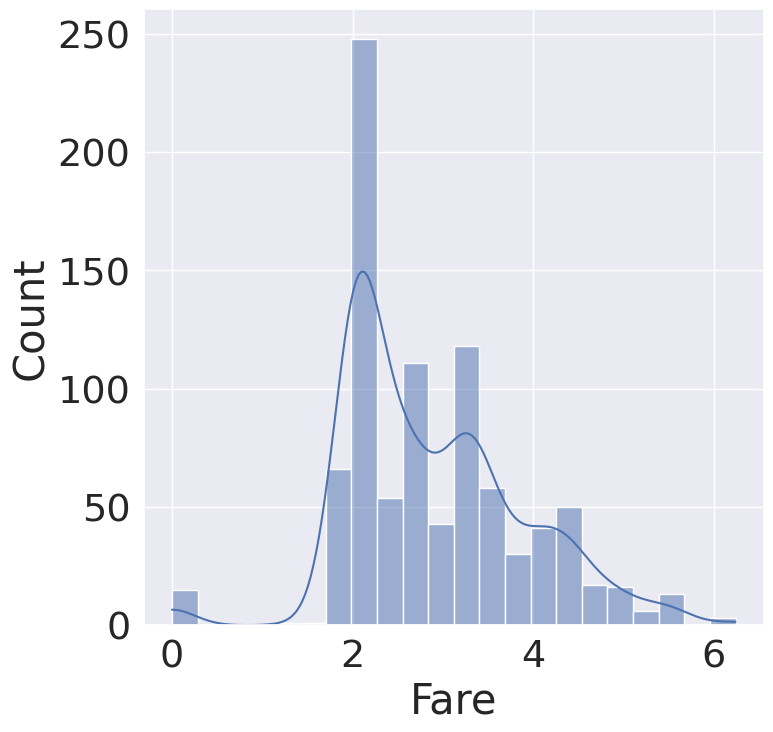

In [1518]:
# log를 취한 Fare의 히스토, kde 그래프를 다시 동시에 그려보자.
f, ax = plt.subplots(1,1,figsize=(8,8))

sns.histplot(data=df_train, ax=ax, kde=True, x='Fare')

plt.show()

## feature engineering : 모델을 학습시키기 위해, 모델의 성능을 높이기 위해 feature들에 여러 조작을 가하거나 새로운 feature를 추가하는 것.

# 2.9 Cabin
- NaN값이 너무 많아 사용하지 않음.

In [1520]:
df_train['Cabin'].isna().sum()

687

In [1522]:
df_train['Cabin'].size

891

In [1524]:
print("Cabin의 null 값 비율= {}".format((df_train['Cabin'].isna().sum()/df_train['Cabin'].size)*100))

Cabin의 null 값 비율= 77.10437710437711


# 2.10 Ticket
-

In [1526]:
df_train['Ticket'].value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

In [1528]:
df_train.groupby('Ticket')['Survived'].mean()

Ticket
110152         1.000000
110413         0.666667
110465         0.000000
110564         1.000000
110813         1.000000
                 ...   
W./C. 6608     0.000000
W./C. 6609     0.000000
W.E.P. 5734    0.000000
W/C 14208      0.000000
WE/P 5735      0.500000
Name: Survived, Length: 681, dtype: float64

In [1530]:
df_train['Ticket'].value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

In [1532]:
df_train['Ticket'].head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [1534]:
print(df_train['Ticket'][0].isdigit())
print(df_train['Ticket'][3].isdigit())

False
True


In [1536]:
digitcol = df_train['Ticket'].map(lambda i : i.isdigit())
digitcol

0      False
1      False
2      False
3       True
4       True
       ...  
886     True
887     True
888    False
889     True
890     True
Name: Ticket, Length: 891, dtype: bool

In [1538]:
df_ticketdigit = df_train.copy()

In [1540]:
df_ticketdigit['TicketDigit'] = digitcol

In [1542]:
df_ticketdigit.groupby('TicketDigit')['Survived'].mean()

TicketDigit
False    0.382609
True     0.384266
Name: Survived, dtype: float64

In [1544]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1546]:
df_prefix = df_train.copy()

In [1548]:
aa = []

def split_prefix(i):
    if len(i.split())>=2:
        aa.append(i.split()[0])
    elif not i.isdigit():
        aa.append(i)
    else:
        aa.append(False)

df_prefix['Ticket'].map(split_prefix)




0      None
1      None
2      None
3      None
4      None
       ... 
886    None
887    None
888    None
889    None
890    None
Name: Ticket, Length: 891, dtype: object

In [1550]:
df_prefix['Prefix'] = aa

In [1552]:
df_prefix.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,A/5
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,PC
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,STON/O2.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False


In [1554]:
a=df_prefix.groupby('Prefix')['Survived'].mean()

In [1556]:
b=df_prefix['Prefix'].value_counts()

In [1558]:
mydf = pd.DataFrame([a,b,df_prefix.groupby('Prefix')['Survived'].sum()])
mydf_t=mydf.T
mydf_t.columns = ['Survived rate','ticket people','ticket Survived num.']
mydf_t

,Survived rate,ticket people,ticket Survived num.
Prefix,,,
False,0.384266,661.0,254.0
A./5.,0.000000,2.0,0.0
A.5.,0.000000,2.0,0.0
A/4,0.000000,3.0,0.0
A/4.,0.000000,3.0,0.0
A/5,0.100000,10.0,1.0
A/5.,0.142857,7.0,1.0
A/S,0.000000,1.0,0.0
A4.,0.000000,1.0,0.0


# 3. Feature engineering
- null data를 어떻게 채우느냐가 모델의 성능을 좌지우지할 수 있다.
- train뿐만 아니라 test도 똑같이 적용해줘야 한다.
    - 🧠 왜 똑같이 적용해야 하는가? (3가지 이유)
    1. 데이터의 '틀' (Schema) 일치
    모델은 특정 '틀'이나 '형태'를 가진 데이터만 입력받을 수 있습니다.
    
    예시 (범주형 변수): Sex 피처를 훈련 시 Male=0, Female=1로 바꿨다고 가정해봅시다. 모델은 0과 1이라는 숫자만 학습했습니다.
    
    문제: 만약 테스트 데이터에 이 변환을 적용하지 않고 'Male'이라는 문자열을 그냥 넣으면, 모델은 이 입력을 처리할 수 없어서 오류를 발생시키거나 완전히 잘못된 예측을 합니다.
    
    2. 모델이 학습한 '패턴'의 일관성
    모델이 학습하는 것은 '피처와 타겟(정답) 간의 관계'입니다.
    
    예시 (파생 변수): 사용자가 타이타닉 데이터의 Ticket 피처에서 '티켓 번호의 자릿수'라는 새 피처(Ticket_Digits)를 만들었다고 가정해봅시다.
    
    학습: 모델은 훈련 데이터를 통해 'Ticket_Digits'가 5일 때는 생존률이 높다는 패턴을 학습했습니다.
    
    문제: 테스트 데이터에 Ticket_Digits 피처를 만들어주지 않으면, 모델은 자신이 학습한 이 중요한 패턴을 써먹을 수 없습니다. 모델은 "가장 중요하게 보라고 배운 Ticket_Digits 피처가 어디 있죠?"라고 물을 것입니다.

In [1560]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: >

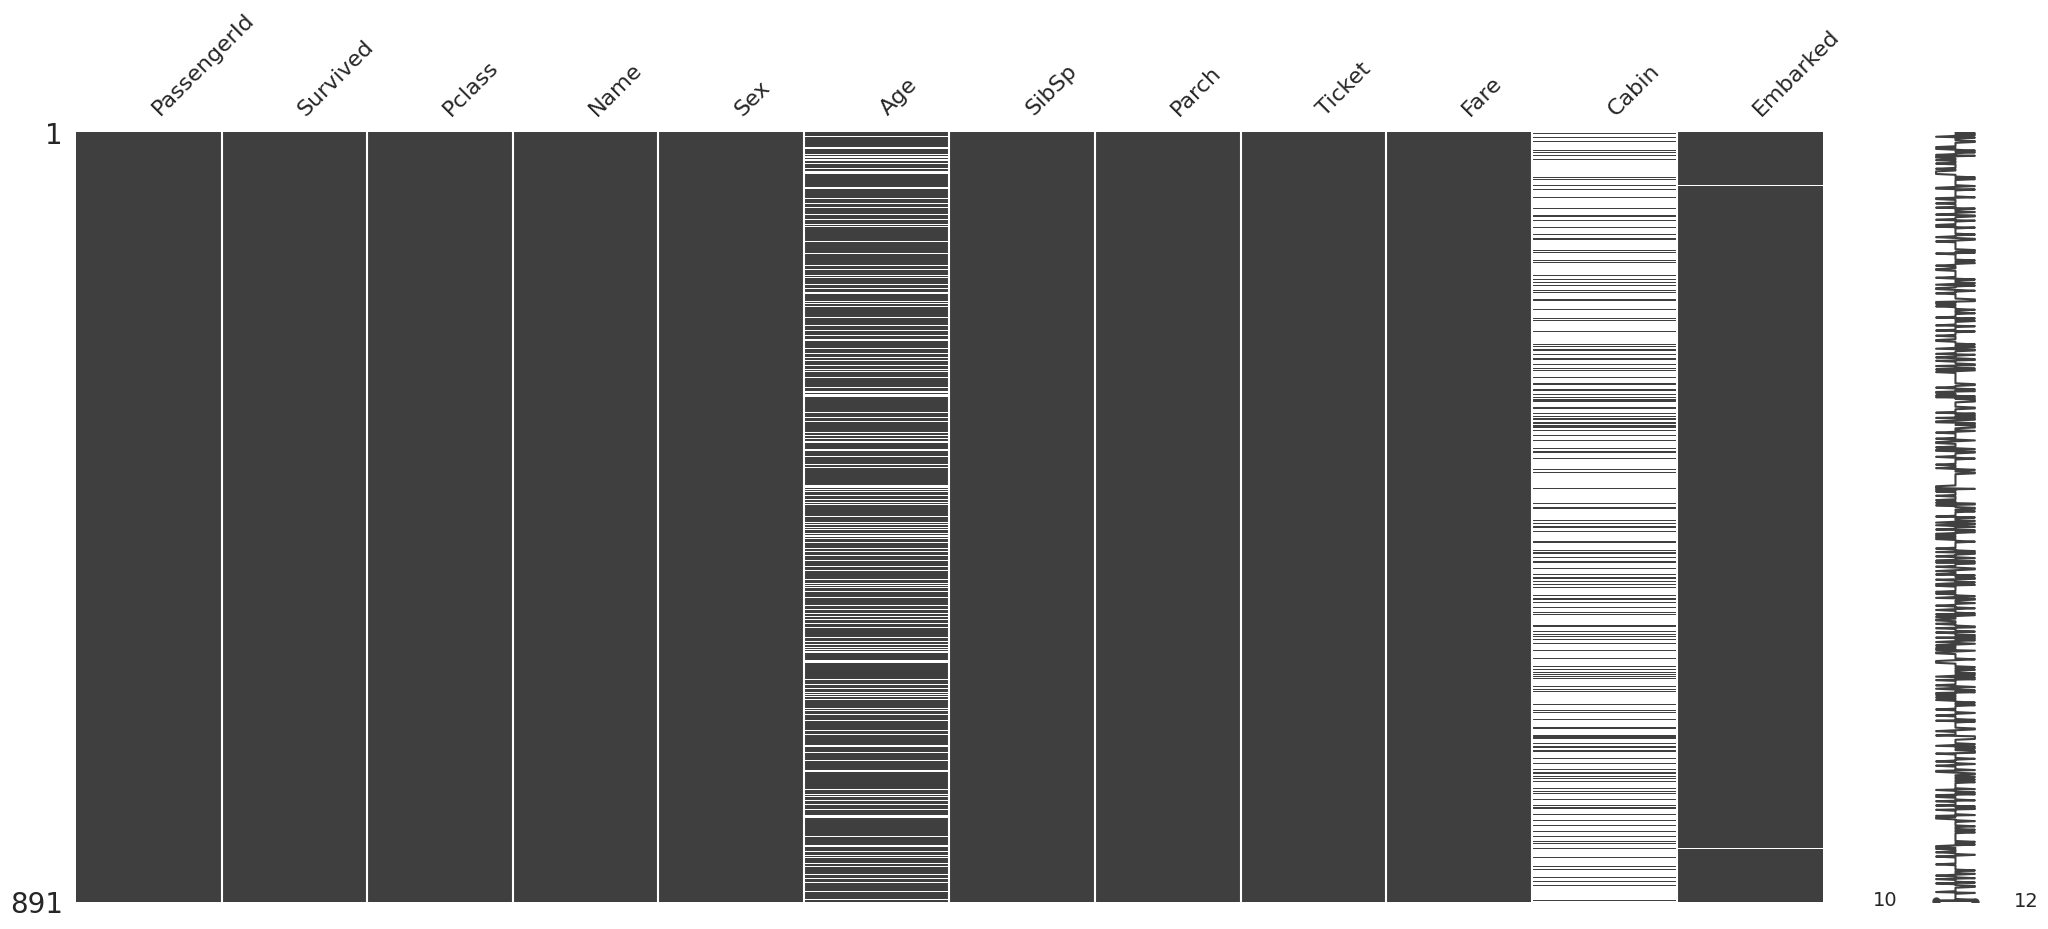

In [1562]:
msno.matrix(df=df_train)

In [1564]:
df_train['Age'].isnull().sum()

177

In [1566]:
len(df_train['Age'])

891

In [1568]:
df_train['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [1570]:
# 내 접근: 불완전함.
title_arr=[]
df_train['Name'].map(lambda i : title_arr.append(i.split()[1]))
title_series = pd.Series(title_arr)
title_series.value_counts()

Mr.             502
Miss.           179
Mrs.            121
Master.          40
Dr.               7
Rev.              6
y                 4
Planke,           3
Impe,             3
Gordon,           2
Col.              2
Mlle.             2
Major.            2
Melkebeke,        1
Jonkheer.         1
Shawah,           1
the               1
Velde,            1
Capt.             1
Messemaeker,      1
Carlo,            1
Ms.               1
Mme.              1
Steen,            1
Mulder,           1
Pelsmaeker,       1
Walle,            1
der               1
Billiard,         1
Don.              1
Cruyssen,         1
Name: count, dtype: int64

In [1572]:
pd.crosstab(title_series,df_train['Sex'])

Sex,female,male
row_0,,
"Billiard,",0,1
Capt.,0,1
"Carlo,",0,1
Col.,0,2
"Cruyssen,",0,1
Don.,0,1
Dr.,1,6
"Gordon,",1,1
"Impe,",2,1


In [1574]:
# .str.extract 정규표현식 접근
title = df_train['Name'].str.extract('([a-zA-Z]+)\.')
title

,0
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr
...,...
886,Rev
887,Miss
888,Miss
889,Mr


In [1576]:
title[0].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

## 1. .str은 Pandas의 '상자(Series)' 안에 담긴 **'개별 문자열'**에 접근하게 해주는 **'필수 연결고리'**입니다.

    - 문자열을 자르고(split), 바꾸고(replace), 찾고(find), 추출하는(extract) 등 문자열에 관련된 거의 모든 작업을 할 때는, "지금부터 이 상자 안에 있는 각각의 문자열에 대한 작업이야!"라고 알려주기 위해 .str을 반드시 먼저 붙여줘야 합니다.

## 2. 정규표현식 `'([A-Za-z]+)\.'` 완벽 정리

    1. () : 캡처 그룹 (가장 중요!)
       - Pandas의 .extract() 함수에게 "패턴 전체가 아니라,
         정확히 이 괄호 안쪽의 내용물만 쏙 뽑아서 반환해"
         라고 지시하는 '추출 영역'입니다.
       - 이게 없으면 'Mr.'가 통째로 추출되지만,
         이게 있어서 'Mr'만 깔끔하게 나옵니다.
    
    2. [A-Za-z] : '문자 세트' (재료)
       - A~Z (대문자) 또는 a~z (소문자),
         즉 '알파벳' 아무 글자 1개를 의미합니다.
    
    3. + : '수량자 (1회 이상)' (개수)
       - 바로 앞의 규칙([A-Za-z])이 1번 이상
         연속으로 반복되는 덩어리(단어)를 찾습니다.
         (예: 'M'이 아닌 'Mr', 'Miss')
    
    4. \. : '이스케이프된 마침표' (끝표시)
       - 정규식의 특수기능(모든 문자)이 아닌,
         문자 그대로의 '마침표(.)'를 찾습니다.

## 3. +는 정규표현식에서 **'수량'**을 나타내는 기호입니다.

    - [a-zA-Z] = 글자 1개 (A, B, C...)
    
    - [a-zA-Z]+ = 글자 1개 이상 덩어리 (Mr, Miss, Dr...)
    
    - "Mr."를 잡으려면 "글자 덩어리"를 찾으라고 +를 붙여줘야 하는 것입니다.

[최종 조합]
"알파벳 덩어리([A-Za-z]+)가 있고,
 그 바로 뒤에 마침표(\.)가 오는 패턴을 찾아라.
 단, 결과는 괄호() 안의 '알파벳 덩어리'만 추출해라."


In [1578]:
df_train['Initial'] = df_train['Name'].str.extract('([a-zA-Z]+)\.')
df_test['Initial'] = df_test['Name'].str.extract('([a-zA-Z]+)\.')

In [1580]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [1582]:
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


<Axes: xlabel='Initial', ylabel='Survived'>

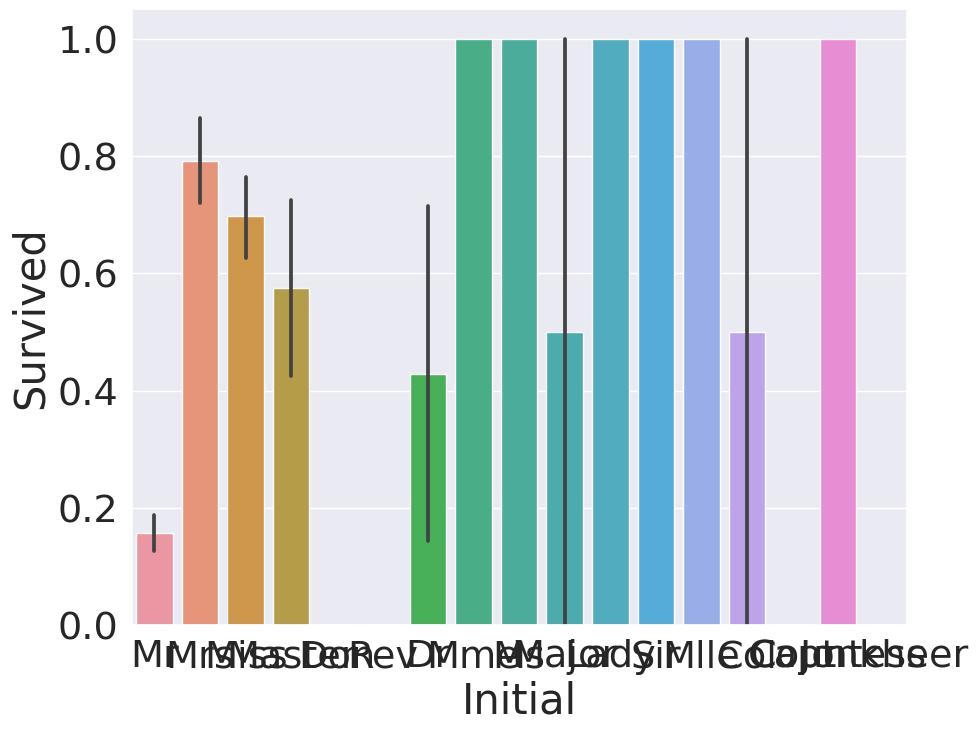

In [1584]:
# Initial에 따른 생존률 barplot으로 그리기
f,ax = plt.subplots(1,1,figsize=(10,8))
sns.barplot(data=df_train, x='Initial', y='Survived',ax=ax)

In [1586]:
df_train['Initial'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [1588]:
# # df_train과 df_test에 동일하게 적용합니다.
# # 내 방법

# # 1. Miss 그룹으로 통합
# df_train['Initial'].replace(['Mlle', 'Ms'], 'Miss', inplace=True)
# df_test['Initial'].replace(['Mlle', 'Ms'], 'Miss', inplace=True)

# # 2. Mrs 그룹으로 통합
# df_train['Initial'].replace(['Mme', 'Countess', 'Lady'], 'Mrs', inplace=True)
# df_test['Initial'].replace(['Mme', 'Countess', 'Lady'], 'Mrs', inplace=True)

# # 3. Mr 그룹으로 통합
# df_train['Initial'].replace(['Capt', 'Col', 'Major', 'Don', 'Sir', 'Dr'], 'Mr', inplace=True)
# df_test['Initial'].replace(['Capt', 'Col', 'Major', 'Don', 'Sir', 'Dr'], 'Mr', inplace=True)

# # 4. Other 그룹으로 통합
# df_train['Initial'].replace(['Jonkheer', 'Rev'], 'Other', inplace=True)
# df_test['Initial'].replace(['Jonkheer', 'Rev'], 'Other', inplace=True)

In [1590]:
# 튜토리얼 방법
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

## 호칭을 몇 개 그룹으로 간추려야 하는 이유
    1. 과적합(Overfitting) 방지
    'Capt'(대위)처럼 데이터가 1~2개뿐인 호칭은 모델이 "Capt는 100% 죽는다" 같은 엉터리 규칙(100% 확률)을 외우게 만듭니다. (이것이 과적합입니다.)
    
    이걸 'Mr' 그룹에 합치면, "Mr 그룹의 사망률은 80%다"처럼 더 일반적이고 안정적인 확률을 학습하게 됩니다.
    
    2. 패턴의 일반화(Generalization)
    우리는 모델이 "대위(Capt)의 생존율"이 아닌, **"성인 남성(Mr)의 생존율"**이라는 더 크고 일반적인 패턴을 배우길 원합니다.
    
    'Capt', 'Major', 'Don' 등은 결국 '성인 남성'이라는 공통된 특징을 가지므로, 'Mr'로 묶어서 모델이 더 큰 그림(일반적인 패턴)을 보게 만듭니다.

<Axes: xlabel='Initial', ylabel='Survived'>

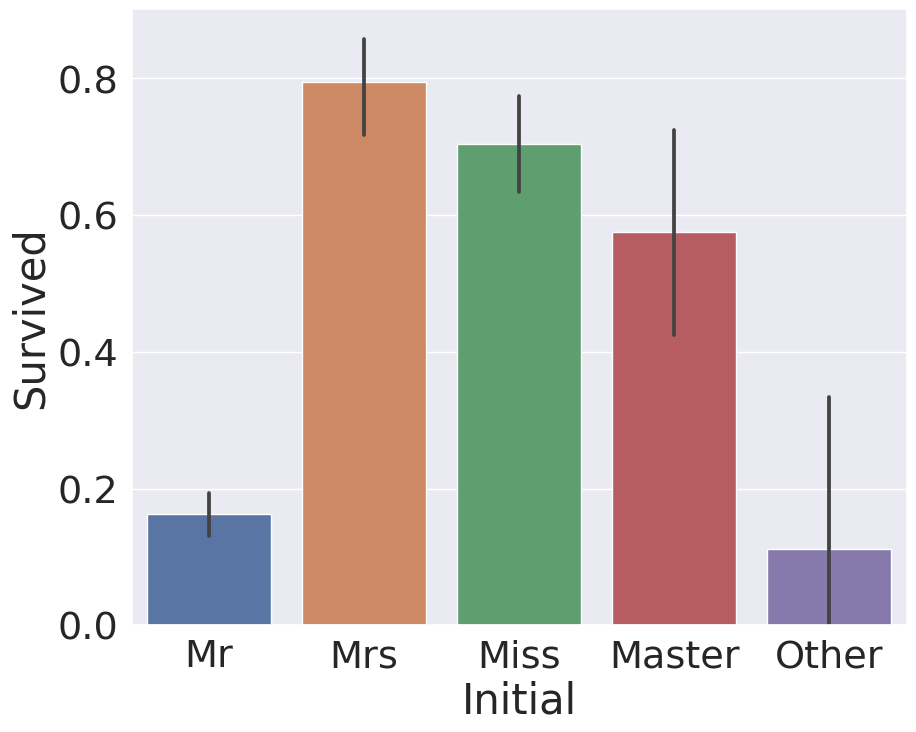

In [1592]:
# Initial에 따른 생존률 barplot으로 그리기
f,ax = plt.subplots(1,1,figsize=(10,8))
sns.barplot(data=df_train, x='Initial', y='Survived',ax=ax)

In [1594]:
df_train.groupby('Initial')['Survived'].value_counts()

Initial  Survived
Master   1            23
         0            17
Miss     1           131
         0            55
Mr       0           443
         1            86
Mrs      1           101
         0            26
Other    0             8
         1             1
Name: count, dtype: int64

In [1596]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Initial          0
dtype: int64

In [1598]:
test1 = pd.DataFrame({
    'Initial':['a','a','a'],
    'Age':[1,np.nan,2]
})
test1.groupby('Initial')['Age'].mean()

Initial
a    1.5
Name: Age, dtype: float64

# 3.1.1 Fill null in Age using Initial
- Age의 null값을 Initial별 Age 평균으로 대체한다.


- 1. 어떤 호칭이 있는지 정리
  2. 호칭별 Age의 평균을 transform해서 붙이기
  3. Age에 null값이 있다면 호칭별 Age의 평균으로 대체.

In [1600]:
# 1. 호칭별로 구분
print("호칭 종류: ",end="")
print(df_train['Initial'].unique())

# 2. age가 있는 사람 중 같은 호칭을 사용하는 age의 평균을 구함
print(df_train.groupby('Initial')['Age'].mean())

# 3. age가 없는 사람의 호칭을 보고 그 호칭의 평균 age를 가져와서 넣기
# => 뒤에 두가지 방법 // 반복문 or transform

호칭 종류: ['Mr' 'Mrs' 'Miss' 'Master' 'Other']
Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64


In [1602]:
type(df_train.groupby('Initial')['Age'].mean())

pandas.core.series.Series

In [1604]:
a= df_train.groupby('Initial')['Age'].mean()
a

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [1606]:
df_train1 = df_train.copy()

In [1608]:
# 3. (내방법sol1)반복문으로 age가 없는 사람의 호칭을 보고 그 호칭의 평균 age를 가져와서 넣기
for i in df_train1.index:
    if pd.isnull(df_train1.loc[i,'Age']):
        df_train1.loc[i,'Age'] = a[df_train1.loc[i,'Initial']]

print(df_train1['Age'].isnull().sum())

0


In [1610]:
df_train['Age'].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [1612]:
# 3. (내방법sol2)transform을 사용해 age가 빈 행에 호칭의 평균 age넣기
df_train2 = df_train.copy()

b= df_train2.groupby('Initial')['Age'].transform('mean')

df_train2['Age'] = b

df_train2['Age'].isnull().sum()

0

In [1614]:
# + fillna 까지 활용한 깔끔한 방법
df_train3 = df_train.copy()

df_train3['Age'].fillna(df_train3.groupby('Initial')['Age'].transform('mean'),inplace=True)
df_train3['Age'].isnull().sum()

# df_test['Age'].fillna(df_train3.groupby('Initial')['Age'].transform('mean'),inplace=True)

0

---

"""
[Pandas 핵심 노트] groupby() & transform() 완전 정복
"""

## 1. transform의 핵심 개념

```
일반적인 mean()은 그룹 수만큼 행이 줄어들어 '요약표'가 되지만,
transform('mean')은 계산된 값을 '원본 데이터 길이'만큼 복사해서 늘려줍니다.
```

[코드 비교]
```
summary_view = df.groupby('반')['점수'].mean()             # 결과: 2행 (반 개수만큼)
full_length  = df.groupby('반')['점수'].transform('mean')  # 결과: N행 (학생 수만큼)
```


## 2. 왜 groupby와 짝꿍인가?

```
끼리끼리 뭉쳐서(groupby) 계산한 통계값을,
다시 원래 자리(원본 행)에 1:1로 붙여주기 위해 함께 사용합니다.
특히 '결측치 채우기'를 할 때 필수적인 조합입니다.
```


## 3. 괄호 안에 들어가는 3가지 형태


① 문자열 사용 (추천! ⭐)
- 판다스 내장 함수라 가장 빠르고 최적화되어 있음.
```
df.groupby('Group')['Value'].transform('mean')
```

② 함수 객체 사용
Numpy 등 외부 라이브러리 함수를 쓸 때 (따옴표 없음).
df.groupby('Group')['Value'].transform(np.mean)

③ 람다(Lambda) 사용
나만의 복잡한 계산 식을 만들 때 사용.
df.groupby('Group')['Value'].transform(lambda x: x - x.mean())


4. [실전] 결측치 채우기 정답 코드

```
목표: 빈 나이(Age) 칸에, 해당 사람이 속한 호칭(Initial) 그룹의 평균을 채운다.
```

한 줄로 깔끔하게 처리
```
df_train['Age'].fillna(
    df_train.groupby('Initial')['Age'].transform('mean'),
    inplace=True
)
```

---


In [1616]:
# (내방법sol3) loc+boolean+column 으로
# 'Age'가 null인 행을 loc로 찾아낸 뒤
# 해당 행의 'Age'열에 'Initial'의 평균'Age'를 넣어줌.
df_train4 = df_train.copy()
df_train4.groupby("Initial")['Age'].transform('mean')

0      32.739609
1      35.981818
2      21.860000
3      35.981818
4      32.739609
         ...    
886    45.888889
887    21.860000
888    21.860000
889    32.739609
890    32.739609
Name: Age, Length: 891, dtype: float64

In [1618]:
df_train4.loc[df_train4['Age'].isnull(),'Age'] = df_train4.groupby("Initial")['Age'].transform('mean')
df_train4['Age'].isnull().sum()

0

In [1620]:
# 튜토리얼 방법 ==> 하드코딩 (내방법보다 별로)
df_train.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [1622]:
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'),'Age'] = 33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'),'Age'] = 36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Master'),'Age'] = 5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'),'Age'] = 22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Other'),'Age'] = 46

df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mr'),'Age'] = 33
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mrs'),'Age'] = 36
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Master'),'Age'] = 5
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Miss'),'Age'] = 22
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Other'),'Age'] = 46

# 3.1.2 Fill Null in Embarked


In [1624]:
df_train['Embarked'].head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

In [1626]:
df_train['Embarked'].isnull().sum()

2

In [1628]:
df_train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [1630]:
# 'S'가 가장 많으므로 'Embarked'의 null값을 'S'로 채운다.
df_train['Embarked'].fillna('S',inplace=True)

In [1632]:
df_train['Embarked'].isnull().sum()

0

# 3.2 Change Age(continuous to categorical)

- 다양한 방법을 알기 위해 Age를 0~10/11~20/... 로 categorical로 만들어보기
- 자칫 information loss가 생길 수 있음.

In [1634]:
df_train['Age'].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [1636]:
# sol1) apply함수를 적용하기 위해 continuous to categorical 함수를 작성한다.
def conToCat(x):
    if x>=0 and x<10:
        return 0
    elif x>=10 and x<20:
        return 1
    elif x>=20 and x<30:
        return 2
    elif x>=30 and x<40:
        return 3
    elif x>=40 and x<50:
        return 4
    elif x>=50 and x<60:
        return 5
    elif x>=60 and x<70:
        return 6
    elif x>=70 and x<80:
        return 7
    elif x>=80 and x<90:
        return 8
    elif x>=90 and x<100:
        return 9
    else:
        return 10

In [1638]:
df_train['Age_cat'] = df_train['Age'].apply(conToCat)
df_test['Age_cat'] = df_test['Age'].apply(conToCat)


df_train['Age_cat'].head()

0    2
1    3
2    2
3    3
4    3
Name: Age_cat, dtype: int64

In [1640]:
# sol2) loc를 사용하여 'Age'가 특정 조건을 만족하면 특정 수를 'Age_cat2에 입력'
df_train['Age_cat'] = 0
df_train.loc[df_train['Age'] < 10, 'Age_cat'] = 0
df_train.loc[(10 <= df_train['Age']) & (df_train['Age'] < 20), 'Age_cat'] = 1
df_train.loc[(20 <= df_train['Age']) & (df_train['Age'] < 30), 'Age_cat'] = 2
df_train.loc[(30 <= df_train['Age']) & (df_train['Age'] < 40), 'Age_cat'] = 3
df_train.loc[(40 <= df_train['Age']) & (df_train['Age'] < 50), 'Age_cat'] = 4
df_train.loc[(50 <= df_train['Age']) & (df_train['Age'] < 60), 'Age_cat'] = 5
df_train.loc[(60 <= df_train['Age']) & (df_train['Age'] < 70), 'Age_cat'] = 6
df_train.loc[70 <= df_train['Age'], 'Age_cat'] = 7

df_test['Age_cat'] = 0
df_test.loc[df_test['Age'] < 10, 'Age_cat'] = 0
df_test.loc[(10 <= df_test['Age']) & (df_test['Age'] < 20), 'Age_cat'] = 1
df_test.loc[(20 <= df_test['Age']) & (df_test['Age'] < 30), 'Age_cat'] = 2
df_test.loc[(30 <= df_test['Age']) & (df_test['Age'] < 40), 'Age_cat'] = 3
df_test.loc[(40 <= df_test['Age']) & (df_test['Age'] < 50), 'Age_cat'] = 4
df_test.loc[(50 <= df_test['Age']) & (df_test['Age'] < 60), 'Age_cat'] = 5
df_test.loc[(60 <= df_test['Age']) & (df_test['Age'] < 70), 'Age_cat'] = 6
df_test.loc[70 <= df_test['Age'], 'Age_cat'] = 7

In [1642]:
df_train['Age_cat'].head()

0    2
1    3
2    2
3    3
4    3
Name: Age_cat, dtype: int64

---

### 위에서 loc로 변경한 이유
#### 핵심 요약: loc를 쓸 때 vs 안 쓸 때

**1. 그냥 썼을 때 (`df[조건]['컬럼'] = 값`)**
    * **작동 방식:** 판다스가 조건에 맞는 데이터를 잘라내어 메모리에 **'임시 복사본(Copy)'**을 먼저 만듭니다.
    * **당신의 행동:** 당신은 원본이 아닌 이 **'임시 복사본'**에 값을 적어 넣었습니다.
    * **최종 결과:** 복사본은 수정 후 즉시 버려지고, **원본 데이터는 하나도 변하지 않습니다.** (수정 실패 ❌)

**2. loc를 썼을 때 (`df.loc[조건, '컬럼'] = 값`)**
    * **작동 방식:** 중간 복사 과정 없이, **원본 데이터의 '주소(행, 열)'**를 한 번에 찾아갑니다.
    * **당신의 행동:** **'원본 그 자체'**의 해당 위치에 값을 직접 꽂아 넣습니다.
    * **최종 결과:** **원본 데이터가 확실하게 수정됩니다.** (수정 성공 ✅)

In [1644]:
# 코드
test = pd.DataFrame({'age':[1,2,3],
                       'name':[1,2,3],
                       'cent':[1,2,3],})
print(test)

# copy를 변경하여 원본은 바뀌지 않음.
test[test['age']>=2]['age']='2이상'
print(test)

# loc로 원본을 변경함. (위에서loc를 쓴 이유)
test.loc[test['age']>=2 , 'age']= '2이상'
print(test)

   age  name  cent
0    1     1     1
1    2     2     2
2    3     3     3
   age  name  cent
0    1     1     1
1    2     2     2
2    3     3     3
   age  name  cent
0    1     1     1
1  2이상     2     2
2  2이상     3     3


---


In [1646]:
# 'Age' 대신 'Age_cat' 을 사용하기 위해 'Age' 열을 삭제
df_train.drop('Age',axis=1,inplace=True)
df_test.drop('Age',axis=1,inplace=True)

# 3.3 Change Initial, Embarked and Sex (string to numerical)

- 현재 Initial은 Mr, Mrs, Miss, Master, Other로, categorical 변수.
- ML 모델에 Input으로 넣기 위해서는 수치화 시켜야된다.

In [1648]:
df_train['Initial'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [1650]:
df_train['Initial'].value_counts()

Initial
Mr        529
Miss      186
Mrs       127
Master     40
Other       9
Name: count, dtype: int64

## 카테고리를 숫자로 매핑할 예정. BUT 조심해야함.

### 핵심 요약: 내 맘대로 숫자 매핑(Label Encoding)의 위험성

    1. 문제의 본질: "숫자의 크기(Magnitude)"
        * 인간의 의도: 단순히 종류를 구분하려고 0, 1, 2, 3을 붙임.
        * 모델의 오해: 4(Other)가 0(Master)보다 수학적으로 더 크거나 중요하다고 학습함.
        * 결과: 순서가 없는 데이터에 거짓 상관관계(False Correlation)가 생김.

    2. 모델에 따른 위험도 차이
        * [매우 위험] 선형 회귀, 딥러닝, 거리 기반(KNN):
            - 수식 계산(곱하기/더하기)이나 거리 측정에 숫자가 직접 사용되어 결과가 왜곡됨.
        * [안전함] 트리 기반(Random Forest, Decision Tree):
            - "값이 2와 같은가?"라는 조건문(Yes/No)으로만 분류하므로 숫자의 크기가 상관없음.

    3. 올바른 해결 가이드
        * 순서가 있는 데이터 (성적 A/B/C, 사이즈 S/M/L):
            - 숫자 매핑(Label Encoding) 사용 OK (순서 정보가 유효함).
        * 순서가 없는 데이터 (이름, 국가, 성별):
            - 반드시 '원-핫 인코딩(One-Hot Encoding)'을 사용하여 숫자의 크기 효과를 없애야 함.

In [1652]:
df_train['Initial'] = df_train['Initial'].map({
    'Master':0,
    'Miss':1,
    'Mr':2,
    'Mrs':3,
    'Other':4,
})
df_test['Initial'] = df_test['Initial'].map({
    'Master':0,
    'Miss':1,
    'Mr':2,
    'Mrs':3,
    'Other':4,
})

In [1654]:
df_test

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,FamilySize,Age_cat
0,892,3,"Kelly, Mr. James",male,0,0,330911,2.057860,NaN,Q,2,1,3
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,363272,1.945910,NaN,S,3,2,4
2,894,2,"Myles, Mr. Thomas Francis",male,0,0,240276,2.270836,NaN,Q,2,1,6
3,895,3,"Wirz, Mr. Albert",male,0,0,315154,2.159003,NaN,S,2,1,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,3101298,2.508582,NaN,S,3,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,0,0,A.5. 3236,2.085672,NaN,S,2,1,3
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,0,0,PC 17758,4.690430,C105,C,2,1,3
415,1307,3,"Saether, Mr. Simon Sivertsen",male,0,0,SOTON/O.Q. 3101262,1.981001,NaN,S,2,1,3
416,1308,3,"Ware, Mr. Frederick",male,0,0,359309,2.085672,NaN,S,2,1,3


In [1656]:
# 이번엔 Embarked를 수치로 바꾸기
df_train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [1658]:
df_train['Embarked'] = df_train['Embarked'].map({
    'C':0,
    'Q':1,
    'S':2,
    })
df_test['Embarked'] = df_test['Embarked'].map({
    'C':0,
    'Q':1,
    'S':2,
    })

In [1660]:
# 이번엔 Sex를 수치로 바꾸기
df_train['Sex'] = df_train['Sex'].map({'female': 0, 'male': 1})
df_test['Sex'] = df_test['Sex'].map({'female': 0, 'male': 1})

In [1662]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Initial', 'FamilySize',
       'Age_cat'],
      dtype='object')

In [1664]:
df_train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,FamilySize,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,0,3,2,3


<Axes: title={'center': 'Pearson Correlation of Features'}>

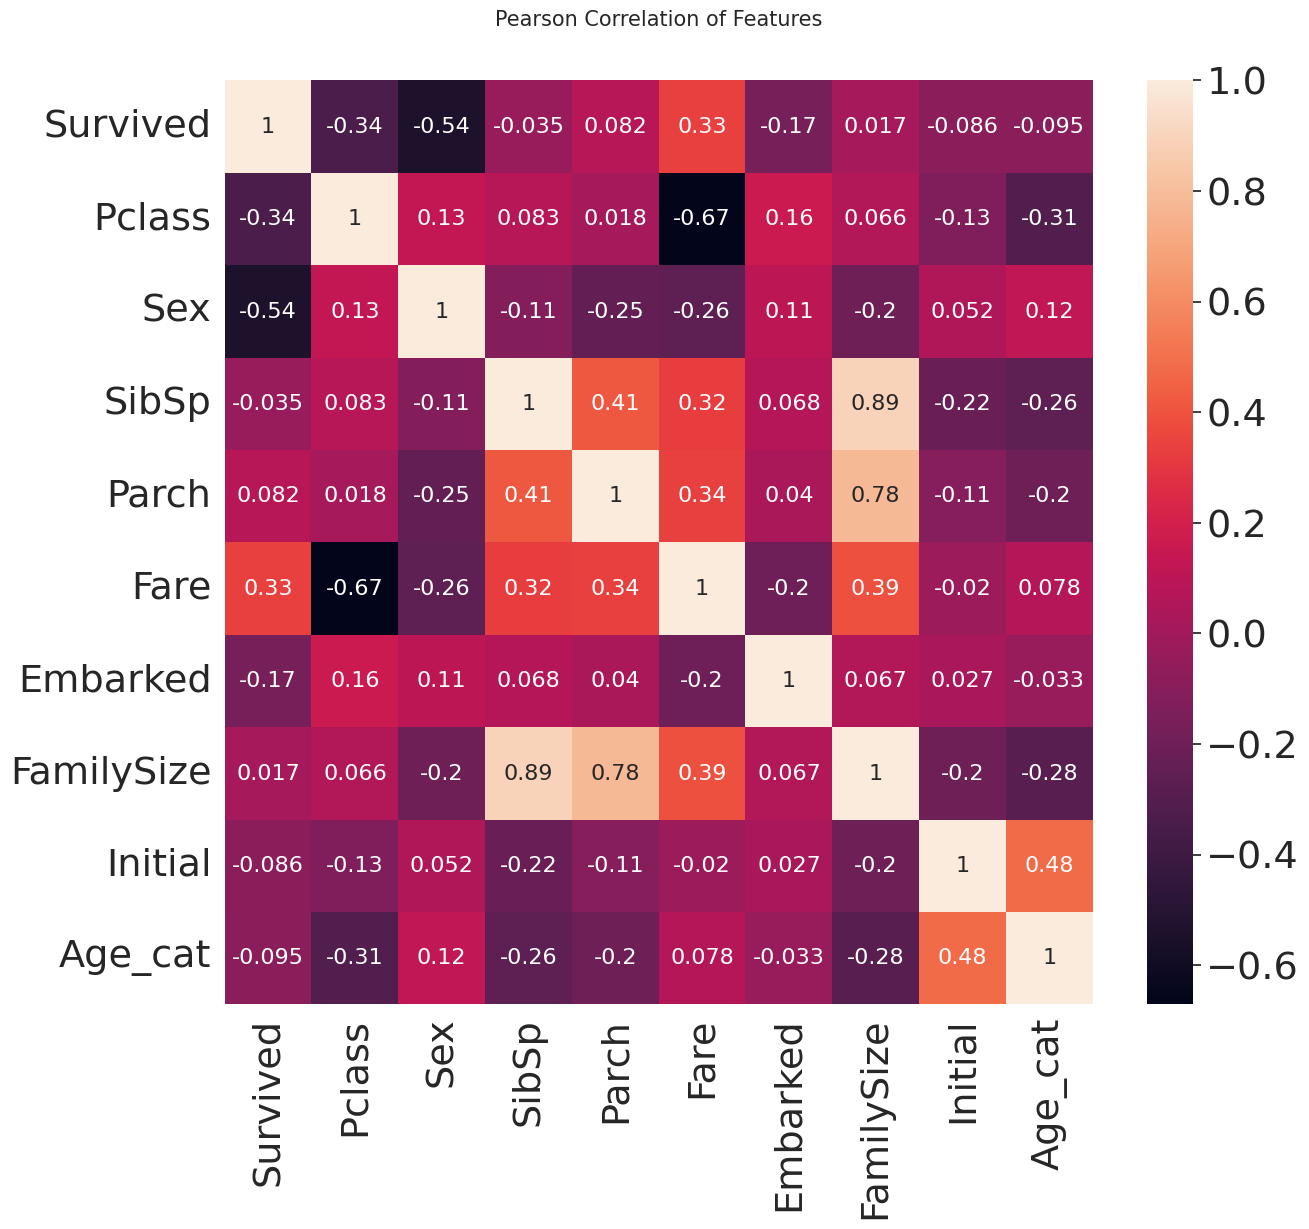

In [1666]:
heatmap_data = df_train[['Survived', 'Pclass', 'Sex','SibSp', 'Parch', 'Fare', 'Embarked', 'FamilySize', 'Initial', 'Age_cat']]

plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.corr(),annot=True,annot_kws={"size": 16})

# 3.4 One-hot encoding on Initial and Embarked
- 순서가 의미없는 Categorical 데이터는 수치화시키기보다
- One-hot encoding이 좋다.

In [1668]:
# Initial 과 Embarked 를 원핫인코딩
df_train = pd.get_dummies(df_train,columns=['Initial','Embarked'],prefix=['Initial','Embarked'],dtype=int)
df_test = pd.get_dummies(df_test,columns=['Initial','Embarked'],prefix=['Initial','Embarked'],dtype=int)

In [1682]:
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Name',  'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [1683]:
df_train.head()

,Survived,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,1.981001,2,2,0,0,1,0,0,0,0,1
1,1,1,0,4.266662,2,3,0,0,0,1,0,1,0,0
2,1,3,0,2.070022,1,2,0,1,0,0,0,0,0,1
3,1,1,0,3.972177,2,3,0,0,0,1,0,0,0,1
4,0,3,1,2.085672,1,3,0,0,1,0,0,0,0,1


# 4 Building machine learning model and prediction using the trained model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split